### House_Price_Pred_Aus

In [4]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib.pyplot import *
import matplotlib.pyplot as plt
import scipy as sts
from scipy import stats
from scipy.stats import zscore
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.model_selection import train_test_split,GridSearchCV, cross_val_score
from sklearn.preprocessing import LabelEncoder,MinMaxScaler,StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor, ExtraTreesRegressor

import warnings
warnings.filterwarnings('ignore')


In [5]:

# importing the datasets
Train = pd.read_csv('train.csv')
Test = pd.read_csv('test.csv')

In [6]:
Train.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1168.000000  1168.000000    954.00000    1168.000000  1168.000000   
mean    724.136130    56.767979     70.98847   10484.749144     6.104452   
std     416.159877    41.940650     24.82875    8957.442311     1.390153   
min       1.000000    20.000000     21.00000    1300.000000     1.000000   
25%     360.500000    20.000000     60.00000    7621.500000     5.000000   
50%     714.500000    50.000000     70.00000    9522.500000     6.000000   
75%    1079.500000    70.000000     80.00000   11515.500000     7.000000   
max    1460.000000   190.000000    313.00000  164660.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1168.000000  1168.000000   1168.000000  1161.000000  1168.000000   
mean      5.595890  1970.930651   1984.758562   102.310078   444.726027   
std       1.124343    30.145255     20.785185   182.595606   462.664785   
min       1.000000  1875.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1954.000000   1966.000000     0.000000     0.000000   
50%       5.000000  1972.000000   1993.000000     0.000000   385.500000   
75%       6.000000  2000.000000   2004.000000   160.000000   714.500000   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000   

        BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  \
count  1168.000000  1168.000000  1168.000000  1168.000000  1168.000000   
mean     46.647260   569.721747  1061.095034  1169.860445   348.826199   
std     163.520016   449.375525   442.272249   391.161983   439.696370   
min       0.000000     0.000000     0.000000   334.000000     0.000000   
25%       0.000000   216.000000   799.000000   892.000000     0.000000   
50%       0.000000   474.000000  1005.500000  1096.500000     0.000000   
75%       0.000000   816.000000  1291.500000  1392.000000   729.000000   
max    1474.000000  2336.000000  6110.000000  4692.000000  2065.000000   

       LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath  \
count   1168.000000  1168.000000   1168.000000   1168.000000  1168.000000   
mean       6.380137  1525.066781      0.425514      0.055651     1.562500   
std       50.892844   528.042957      0.521615      0.236699     0.551882   
min        0.000000   334.000000      0.000000      0.000000     0.000000   
25%        0.000000  1143.250000      0.000000      0.000000     1.000000   
50%        0.000000  1468.500000      0.000000      0.000000     2.000000   
75%        0.000000  1795.000000      1.000000      0.000000     2.000000   
max      572.000000  5642.000000      3.000000      2.000000     3.000000   

          HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  \
count  1168.000000   1168.000000   1168.000000   1168.000000  1168.000000   
mean      0.388699      2.884418      1.045377      6.542808     0.617295   
std       0.504929      0.817229      0.216292      1.598484     0.650575   
min       0.000000      0.000000      0.000000      2.000000     0.000000   
25%       0.000000      2.000000      1.000000      5.000000     0.000000   
50%       0.000000      3.000000      1.000000      6.000000     1.000000   
75%       1.000000      3.000000      1.000000      7.000000     1.000000   
max       2.000000      8.000000      3.000000     14.000000     3.000000   

       GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  \
count  1104.000000  1168.000000  1168.000000  1168.000000  1168.000000   
mean   1978.193841     1.776541   476.860445    96.206336    46.559932   
std      24.890704     0.745554   214.466769   126.158988    66.381023   
min    1900.000000     0.000000     0.000000     0.000000     0.000000   
25%    1961.000000     1.000000   338.000000     0.000000     0.000000   
50%    1980.000000     2.000000   480.000000     0.000000    24.000000   
75%    2002.000000     2.000000   576.000000   171.000000    70.000000   
max    2

In [7]:
Train.describe().T

count           mean           std      min        25%  \
Id             1168.0     724.136130    416.159877      1.0     360.50   
MSSubClass     1168.0      56.767979     41.940650     20.0      20.00   
LotFrontage     954.0      70.988470     24.828750     21.0      60.00   
LotArea        1168.0   10484.749144   8957.442311   1300.0    7621.50   
OverallQual    1168.0       6.104452      1.390153      1.0       5.00   
OverallCond    1168.0       5.595890      1.124343      1.0       5.00   
YearBuilt      1168.0    1970.930651     30.145255   1875.0    1954.00   
YearRemodAdd   1168.0    1984.758562     20.785185   1950.0    1966.00   
MasVnrArea     1161.0     102.310078    182.595606      0.0       0.00   
BsmtFinSF1     1168.0     444.726027    462.664785      0.0       0.00   
BsmtFinSF2     1168.0      46.647260    163.520016      0.0       0.00   
BsmtUnfSF      1168.0     569.721747    449.375525      0.0     216.00   
TotalBsmtSF    1168.0    1061.095034    442.272249      0.0     799.00   
1stFlrSF       1168.0    1169.860445    391.161983    334.0     892.00   
2ndFlrSF       1168.0     348.826199    439.696370      0.0       0.00   
LowQualFinSF   1168.0       6.380137     50.892844      0.0       0.00   
GrLivArea      1168.0    1525.066781    528.042957    334.0    1143.25   
BsmtFullBath   1168.0       0.425514      0.521615      0.0       0.00   
BsmtHalfBath   1168.0       0.055651      0.236699      0.0       0.00   
FullBath       1168.0       1.562500      0.551882      0.0       1.00   
HalfBath       1168.0       0.388699      0.504929      0.0       0.00   
BedroomAbvGr   1168.0       2.884418      0.817229      0.0       2.00   
KitchenAbvGr   1168.0       1.045377      0.216292      0.0       1.00   
TotRmsAbvGrd   1168.0       6.542808      1.598484      2.0       5.00   
Fireplaces     1168.0       0.617295      0.650575      0.0       0.00   
GarageYrBlt    1104.0    1978.193841     24.890704   1900.0    1961.00   
GarageCars     1168.0       1.776541      0.745554      0.0       1.00   
GarageArea     1168.0     476.860445    214.466769      0.0     338.00   
WoodDeckSF     1168.0      96.206336    126.158988      0.0       0.00   
OpenPorchSF    1168.0      46.559932     66.381023      0.0       0.00   
EnclosedPorch  1168.0      23.015411     63.191089      0.0       0.00   
3SsnPorch      1168.0       3.639555     29.088867      0.0       0.00   
ScreenPorch    1168.0      15.051370     55.080816      0.0       0.00   
PoolArea       1168.0       3.448630     44.896939      0.0       0.00   
MiscVal        1168.0      47.315068    543.264432      0.0       0.00   
MoSold         1168.0       6.344178      2.686352      1.0       5.00   
YrSold         1168.0    2007.804795      1.329738   2006.0    2007.00   
SalePrice      1168.0  181477.005993  79105.586863  34900.0  130375.00   

                    50%       75%       max  
Id                714.5    1079.5    1460.0  
MSSubClass         50.0      70.0     190.0  
LotFrontage        70.0      80.0     313.0  
LotArea          9522.5   11515.5  164660.0  
OverallQual         6.0       7.0      10.0  
OverallCond         5.0       6.0       9.0  
YearBuilt        1972.0    2000.0    2010.0  
YearRemodAdd     1993.0    2004.0    2010.0  
MasVnrArea          0.0     160.0    1600.0  
BsmtFinSF1        385.5     714.5    5644.0  
BsmtFinSF2          0.0       0.0    1474.0  
BsmtUnfSF         474.0     816.0    2336.0  
TotalBsmtSF      1005.5    1291.5    6110.0  
1stFlrSF         1096.5    1392.0    4692.0  
2ndFlrSF            0.0     729.0    2065.0  
LowQualFinSF        0.0       0.0     572.0  
GrLivArea        1468.5    1795.0    5642.0  
BsmtFullBath        0.0       1.0       3.0  
BsmtHalfBath        0.0       0.0       2.0  
FullBath            2.0       2.0       3.0  
HalfBath            0.0       1.0       2.0  
BedroomAbvGr        3.0       3.0       8.0  
KitchenAbvGr        1.0       1.0       3.0  
TotRmsAbvGrd        6.0  

In [8]:
Test.describe().T

count          mean           std     min      25%     50%  \
Id             292.0    755.955479    442.565228     6.0   377.75   778.0   
MSSubClass     292.0     57.414384     43.780649    20.0    20.00    50.0   
LotFrontage    247.0     66.425101     21.726343    21.0    53.50    65.0   
LotArea        292.0  10645.143836  13330.669795  1526.0  7200.00  9200.0   
OverallQual    292.0      6.078767      1.356147     3.0     5.00     6.0   
OverallCond    292.0      5.493151      1.063267     3.0     5.00     5.0   
YearBuilt      292.0   1972.616438     30.447016  1872.0  1954.00  1976.0   
YearRemodAdd   292.0   1985.294521     20.105792  1950.0  1968.00  1994.0   
MasVnrArea     291.0    109.171821    175.030021     0.0     0.00     0.0   
BsmtFinSF1     292.0    439.294521    429.559675     0.0     0.00   369.5   
BsmtFinSF2     292.0     46.157534    152.467119     0.0     0.00     0.0   
BsmtUnfSF      292.0    557.315068    411.043768     0.0   255.00   487.0   
TotalBsmtSF    292.0   1042.767123    424.561153     0.0   771.75   971.0   
1stFlrSF       292.0   1133.691781    366.941919   372.0   858.00  1047.5   
2ndFlrSF       292.0    339.657534    424.278825     0.0     0.00     0.0   
LowQualFinSF   292.0      3.702055     38.219527     0.0     0.00     0.0   
GrLivArea      292.0   1477.051370    514.199429   520.0  1061.50  1440.0   
BsmtFullBath   292.0      0.424658      0.508831     0.0     0.00     0.0   
BsmtHalfBath   292.0      0.065068      0.247070     0.0     0.00     0.0   
FullBath       292.0      1.575342      0.547856     0.0     1.00     2.0   
HalfBath       292.0      0.359589      0.494795     0.0     0.00     0.0   
BedroomAbvGr   292.0      2.794521      0.807336     0.0     2.00     3.0   
KitchenAbvGr   292.0      1.051370      0.236160     1.0     1.00     1.0   
TotRmsAbvGrd   292.0      6.417808      1.728105     3.0     5.00     6.0   
Fireplaces     292.0      0.595890      0.621259     0.0     0.00     1.0   
GarageYrBlt    275.0   1979.760000     23.868875  1916.0  1964.00  1979.0   
GarageCars     292.0      1.729452      0.754430     0.0     1.00     2.0   
GarageArea     292.0    457.458904    210.785591     0.0   300.00   467.5   
WoodDeckSF     292.0     86.397260    121.898836     0.0     0.00     0.0   
OpenPorchSF    292.0     47.061644     65.865449     0.0     0.00    28.5   
EnclosedPorch  292.0     17.708904     51.892906     0.0     0.00     0.0   
3SsnPorch      292.0      2.489726     30.247488     0.0     0.00     0.0   
ScreenPorch    292.0     15.099315     58.483473     0.0     0.00     0.0   
PoolArea       292.0      0.000000      0.000000     0.0     0.00     0.0   
PoolQC           0.0           NaN           NaN     NaN      NaN     NaN   
MiscVal        292.0     28.184932    224.036218     0.0     0.00     0.0   
MoSold         292.0      6.232877      2.774556     1.0     4.00     6.0   
YrSold         292.0   2007.859589      1.322867  2006.0  2007.00  2008.0   

                    75%       max  
Id              1152.25    1456.0  
MSSubClass        70.00     190.0  
LotFrontage       79.00     150.0  
LotArea        11658.75  215245.0  
OverallQual        7.00      10.0  
OverallCond        6.00       9.0  
YearBuilt       2001.00    2009.0  
YearRemodAdd    2003.25    2010.0  
MasVnrArea       180.00    1031.0  
BsmtFinSF1       700.50    1767.0  
BsmtFinSF2         0.00    1085.0  
BsmtUnfSF        780.00    1935.0  
TotalBsmtSF     1322.00    3094.0  
1stFlrSF        1370.50    2402.0  
2ndFlrSF         717.00    1589.0  
LowQualFinSF       0.00     479.0  
GrLivArea       1720.25    3447.0  
BsmtFullBath       1.00       2.0  
BsmtHalfBath       0.00       1.0  
FullBath           2.00       3.0  
HalfBath           1.00       2.0  
BedroomAbvGr       3.00       6.0  
KitchenAbvGr       1.00       3.0  
TotRmsAbvGrd       7.00      12.0  
Fireplaces         1.00       2.0  
GarageYrBlt     2003.00    2010.0  
GarageCars         2.00       4.0  
Gar

In [9]:
Train.columns,len(Train.columns)

(Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
        'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
        'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
        'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
        'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
        'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
        'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
        'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
        'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
        'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
        'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
        'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
        'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
        'GarageCond

In [10]:
Test.columns,len(Test.columns)

(Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
        'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
        'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
        'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
        'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
        'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
        'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
        'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
        'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
        'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
        'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
        'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
        'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
        'GarageCond

In [11]:
# Train Dataset details 
# more infor on the dataset 
print('Size of dataset \n ',Train.shape,'\n')
print('Details dataset\n' ,Train.info(),'\n')
print('Checking for NULL/Missing values \n',Train.isna().sum())

Size of dataset 
  (1168, 81) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   int64  
 2   MSZoning       1168 non-null   object 
 3   LotFrontage    954 non-null    float64
 4   LotArea        1168 non-null   int64  
 5   Street         1168 non-null   object 
 6   Alley          77 non-null     object 
 7   LotShape       1168 non-null   object 
 8   LandContour    1168 non-null   object 
 9   Utilities      1168 non-null   object 
 10  LotConfig      1168 non-null   object 
 11  LandSlope      1168 non-null   object 
 12  Neighborhood   1168 non-null   object 
 13  Condition1     1168 non-null   object 
 14  Condition2     1168 non-null   object 
 15  BldgType       1168 non-null   object 
 16  HouseStyle     1168 non-null   object 
 17  OverallQual    1168 

In [12]:
# Test Dataset details 
# more infor on the dataset 
print('Size of dataset \n ',Test.shape,'\n')
print('Details dataset\n' ,Test.info(),'\n')
print('Checking for NULL/Missing values \n',Test.isna().sum())

Size of dataset 
  (292, 80) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292 entries, 0 to 291
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             292 non-null    int64  
 1   MSSubClass     292 non-null    int64  
 2   MSZoning       292 non-null    object 
 3   LotFrontage    247 non-null    float64
 4   LotArea        292 non-null    int64  
 5   Street         292 non-null    object 
 6   Alley          14 non-null     object 
 7   LotShape       292 non-null    object 
 8   LandContour    292 non-null    object 
 9   Utilities      292 non-null    object 
 10  LotConfig      292 non-null    object 
 11  LandSlope      292 non-null    object 
 12  Neighborhood   292 non-null    object 
 13  Condition1     292 non-null    object 
 14  Condition2     292 non-null    object 
 15  BldgType       292 non-null    object 
 16  HouseStyle     292 non-null    object 
 17  OverallQual    292 non-

In [19]:
Col_with_na=[nan_col for nan_col in Train.columns if Train[nan_col].isnull().sum()>1]

for nan_col in Col_with_na:
    print(nan_col, np.round(Train[nan_col].isnull().mean(), 4),  ' %  of  data missing in Train')

LotFrontage 0.1832  %  of  data missing in Train
Alley 0.9341  %  of  data missing in Train
MasVnrType 0.006  %  of  data missing in Train
MasVnrArea 0.006  %  of  data missing in Train
BsmtQual 0.0257  %  of  data missing in Train
BsmtCond 0.0257  %  of  data missing in Train
BsmtExposure 0.0265  %  of  data missing in Train
BsmtFinType1 0.0257  %  of  data missing in Train
BsmtFinType2 0.0265  %  of  data missing in Train
FireplaceQu 0.4717  %  of  data missing in Train
GarageType 0.0548  %  of  data missing in Train
GarageYrBlt 0.0548  %  of  data missing in Train
GarageFinish 0.0548  %  of  data missing in Train
GarageQual 0.0548  %  of  data missing in Train
GarageCond 0.0548  %  of  data missing in Train
PoolQC 0.994  %  of  data missing in Train
Fence 0.7971  %  of  data missing in Train
MiscFeature 0.9623  %  of  data missing in Train


In [20]:
Col_with_na=[nan_col for nan_col in Test.columns if Test[nan_col].isnull().sum()>1]


for nan_col in Col_with_na: 

    print(nan_col, np.round(Test[nan_col].isnull().mean(), 4),  ' %  of  data missing in Test')

LotFrontage 0.1541  %  of  data missing in Test
Alley 0.9521  %  of  data missing in Test
BsmtQual 0.024  %  of  data missing in Test
BsmtCond 0.024  %  of  data missing in Test
BsmtExposure 0.024  %  of  data missing in Test
BsmtFinType1 0.024  %  of  data missing in Test
BsmtFinType2 0.024  %  of  data missing in Test
FireplaceQu 0.476  %  of  data missing in Test
GarageType 0.0582  %  of  data missing in Test
GarageYrBlt 0.0582  %  of  data missing in Test
GarageFinish 0.0582  %  of  data missing in Test
GarageQual 0.0582  %  of  data missing in Test
GarageCond 0.0582  %  of  data missing in Test
PoolQC 1.0  %  of  data missing in Test
Fence 0.8493  %  of  data missing in Test
MiscFeature 0.9658  %  of  data missing in Test


 * UniVARIATE ANALYSIS 

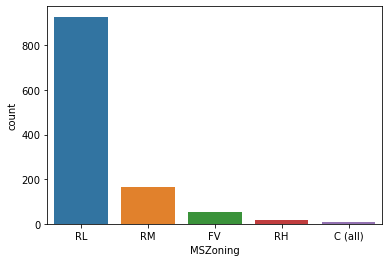

RL         928
RM         163
FV          52
RH          16
C (all)      9
Name: MSZoning, dtype: int64

In [30]:
#MSZoning
Train.MSZoning.value_counts()
sns.countplot(Train.MSZoning)
plt.show()
Train.MSZoning.value_counts()

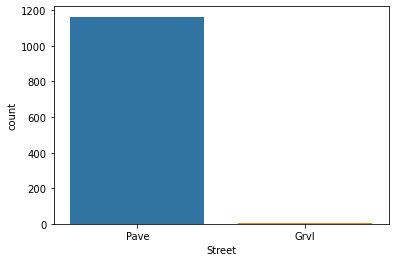

Pave    1164
Grvl       4
Name: Street, dtype: int64

In [28]:
#MSZoning
Train.Street.value_counts()
sns.countplot(Train.Street)
plt.show()
Train.Street.value_counts()

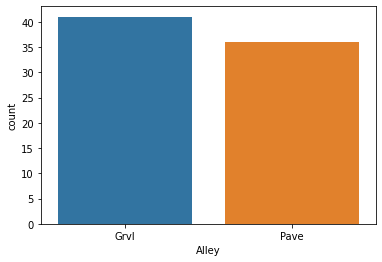

Grvl    41
Pave    36
Name: Alley, dtype: int64

In [27]:
#Alley
Train.Alley.value_counts()
sns.countplot(Train.Alley)
plt.show()
Train.Alley.value_counts()

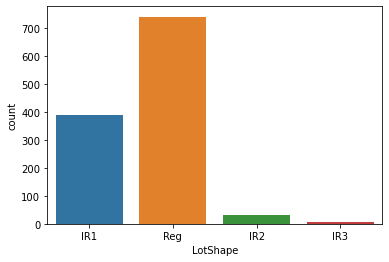

Reg    740
IR1    390
IR2     32
IR3      6
Name: LotShape, dtype: int64

In [32]:
#LotShape
sns.countplot(Train.LotShape)
plt.show()
Train.LotShape.value_counts()

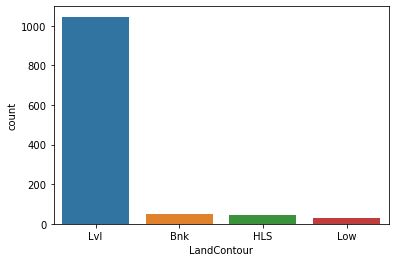

Lvl    1046
Bnk      50
HLS      42
Low      30
Name: LandContour, dtype: int64

In [34]:
#LandContour
sns.countplot(Train.LandContour)
plt.show()
Train.LandContour.value_counts()

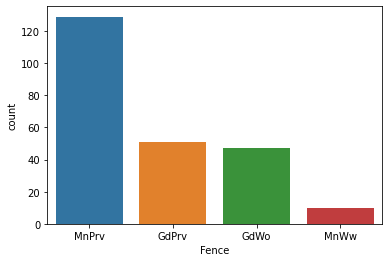

MnPrv    129
GdPrv     51
GdWo      47
MnWw      10
Name: Fence, dtype: int64

In [35]:
#Fence
sns.countplot(Train.Fence)
plt.show()
Train.Fence.value_counts()

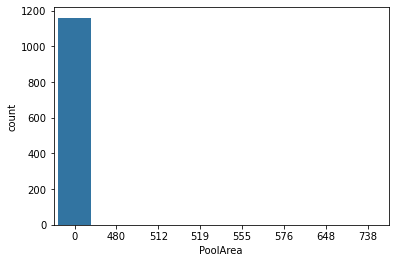

0      1161
738       1
648       1
576       1
555       1
519       1
512       1
480       1
Name: PoolArea, dtype: int64

In [37]:
#PoolArea
sns.countplot(Train.PoolArea)
plt.show()
Train.PoolArea.value_counts()

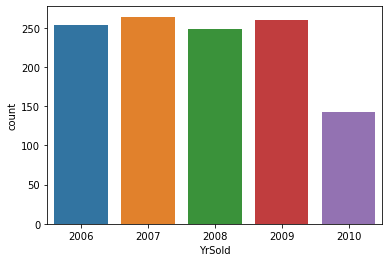

2007    264
2009    260
2006    254
2008    248
2010    142
Name: YrSold, dtype: int64

In [36]:
#YrSold
sns.countplot(Train.YrSold)
plt.show()
Train.YrSold.value_counts()

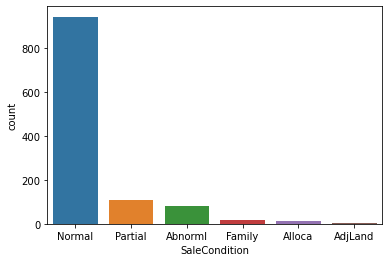

Normal     945
Partial    108
Abnorml     81
Family      18
Alloca      12
AdjLand      4
Name: SaleCondition, dtype: int64

In [38]:
#SaleCondition
sns.countplot(Train.SaleCondition)
plt.show()
Train.SaleCondition.value_counts()

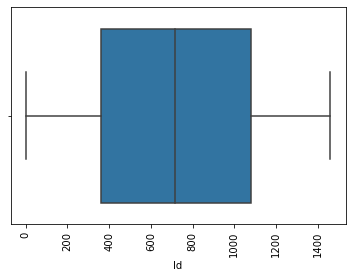

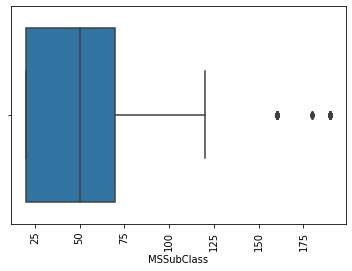

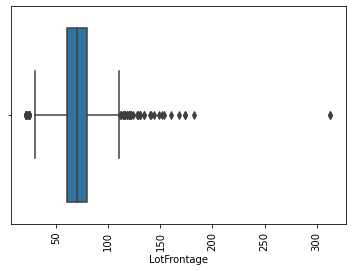

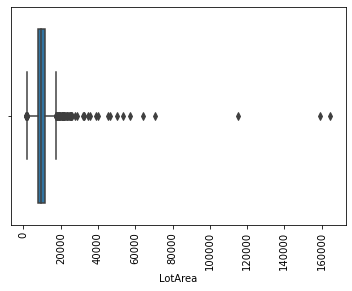

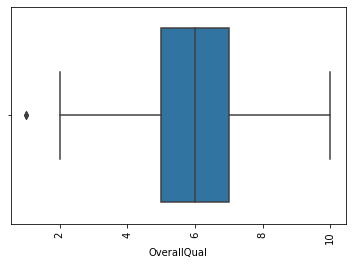

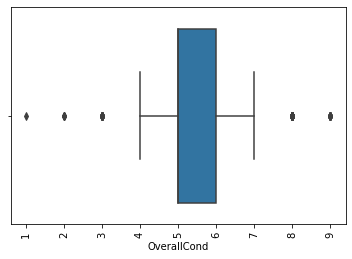

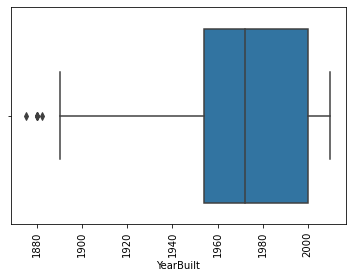

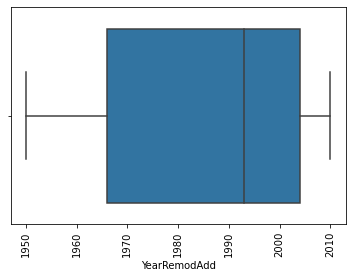

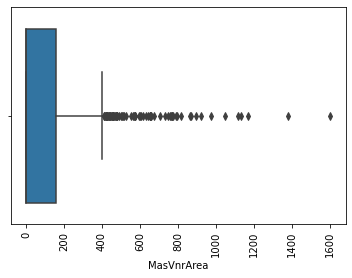

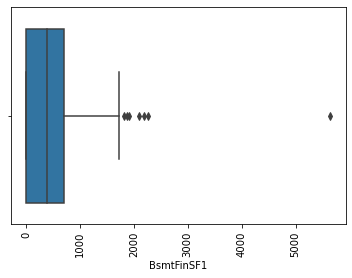

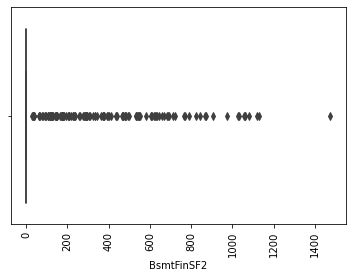

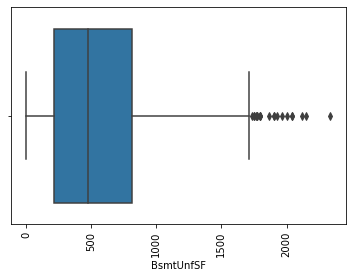

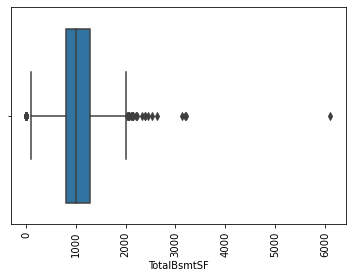

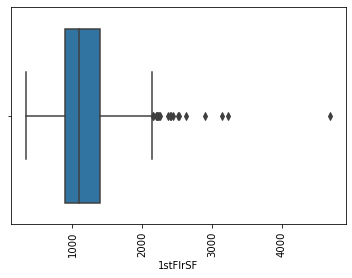

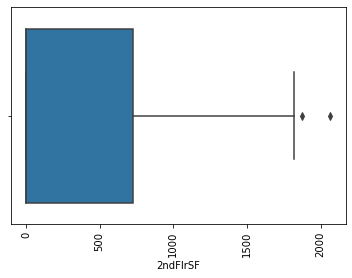

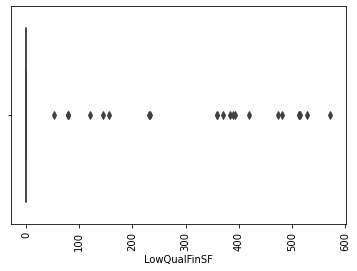

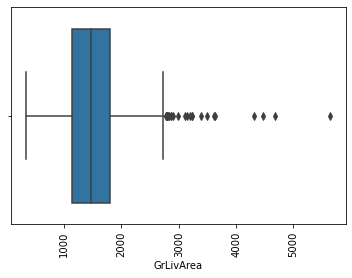

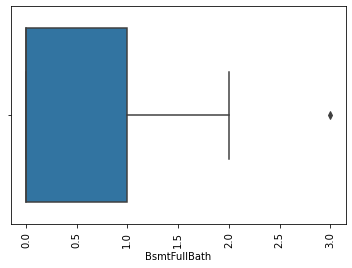

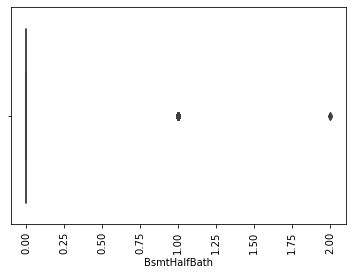

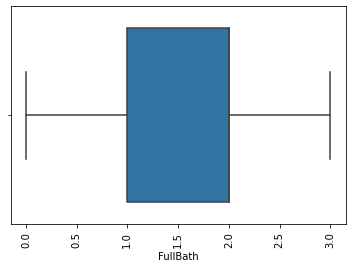

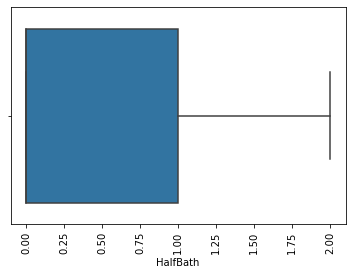

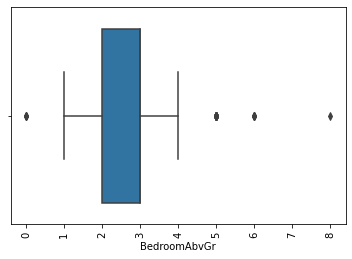

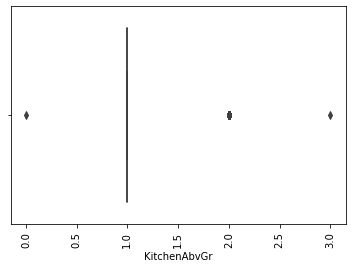

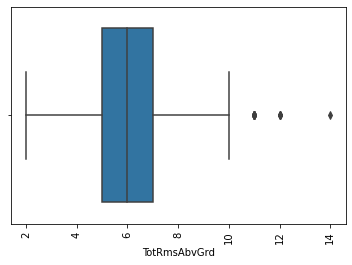

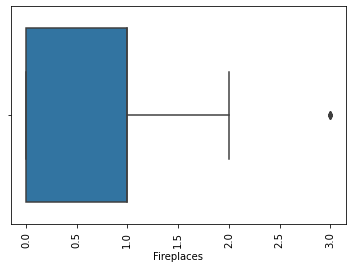

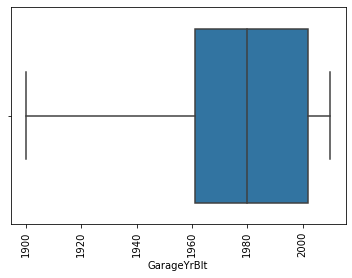

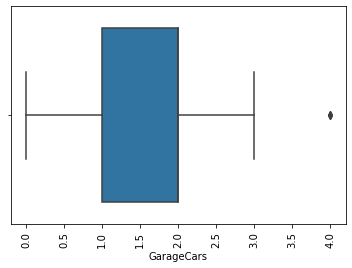

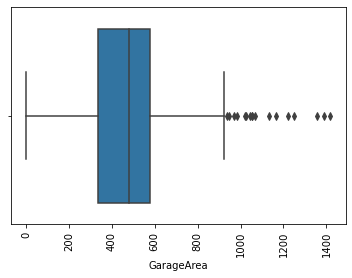

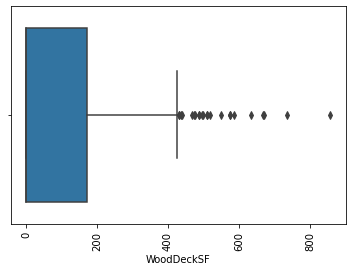

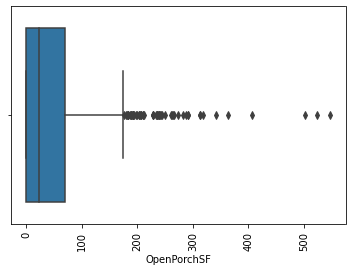

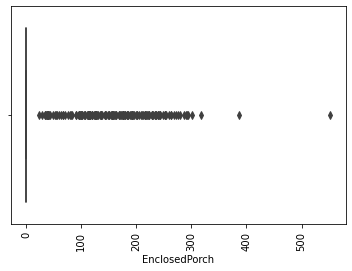

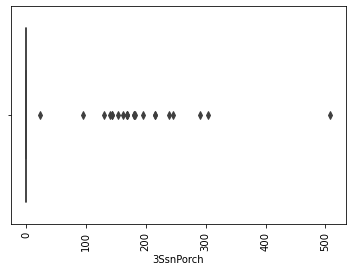

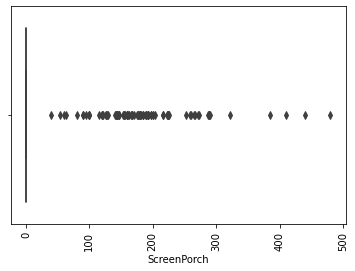

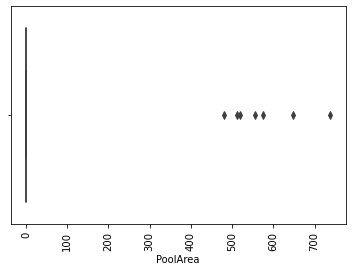

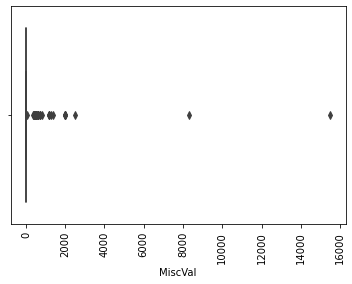

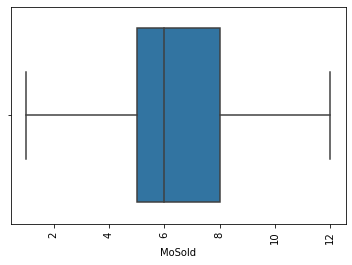

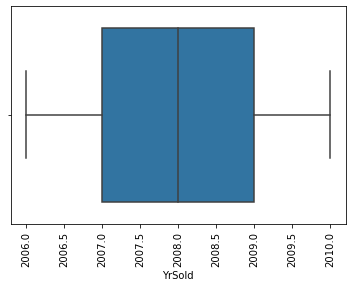

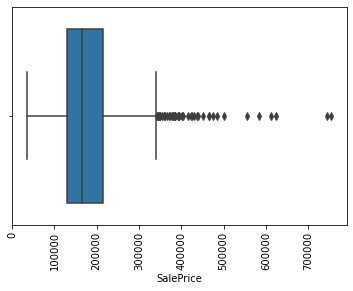

In [39]:
for i in Train.describe().columns:
    # Train[i].plot.box()
    sns.boxplot(Train[i])
    plt.xticks(rotation=90)
    plt.show()

In [40]:
#Heat Map

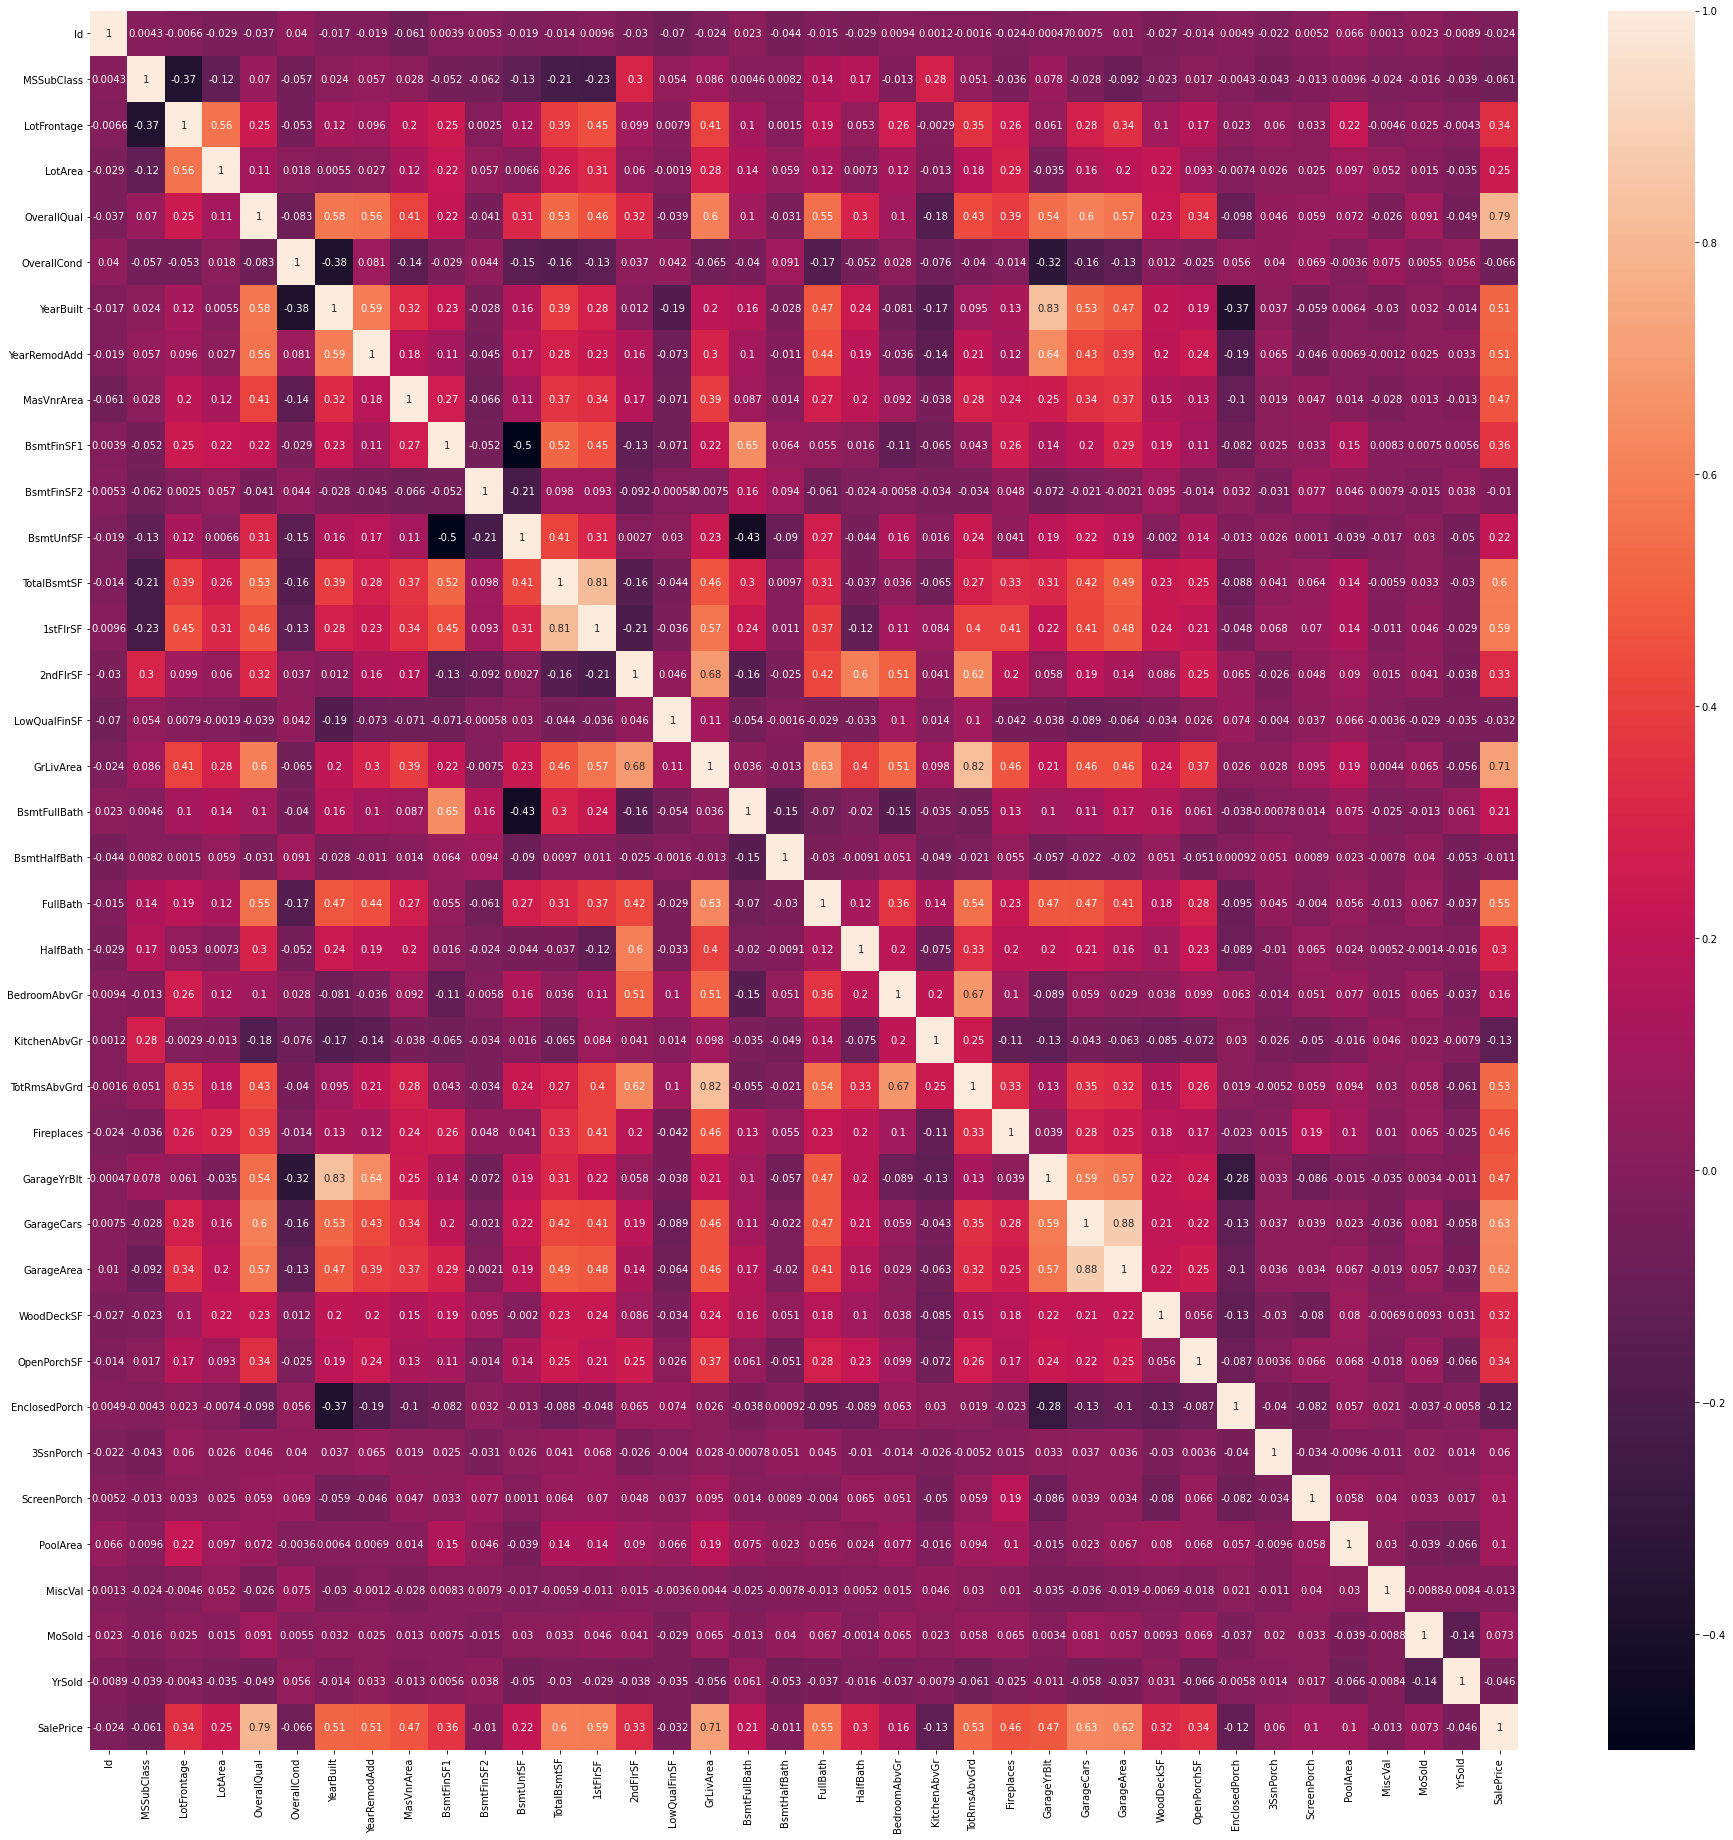

In [43]:
plt.figure(figsize=(32,32))
sns.heatmap(Train.corr(),annot=True,)
plt.show()

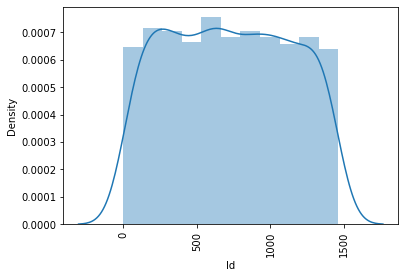

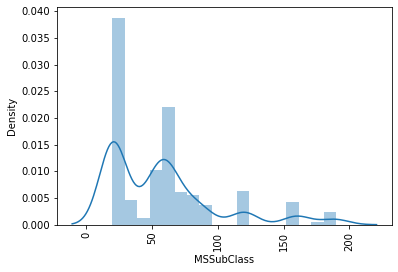

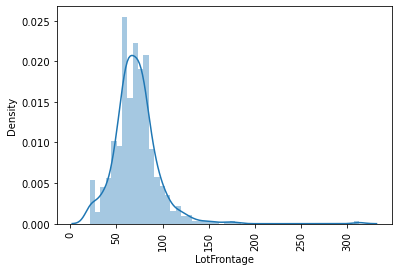

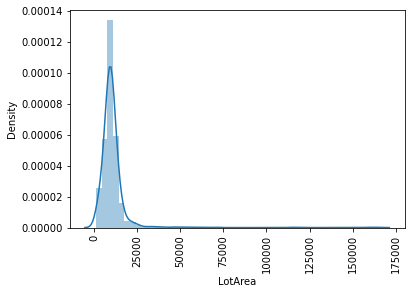

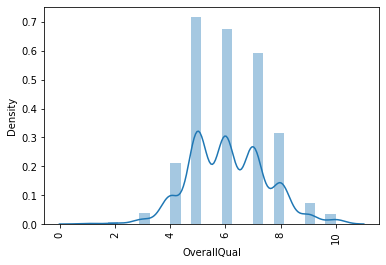

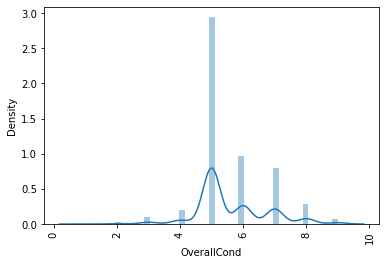

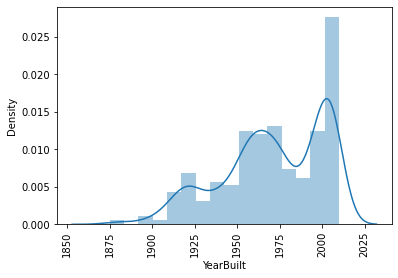

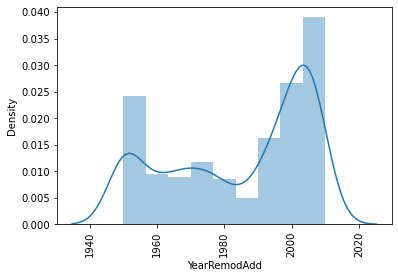

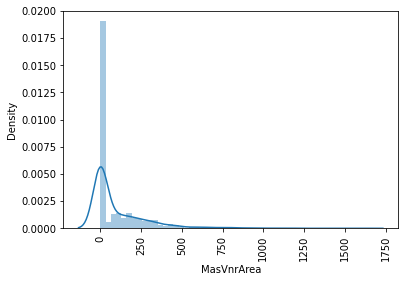

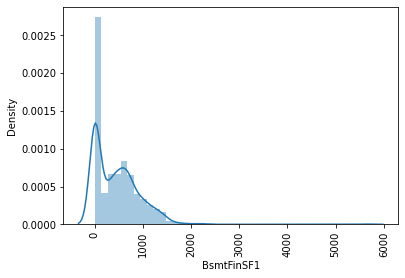

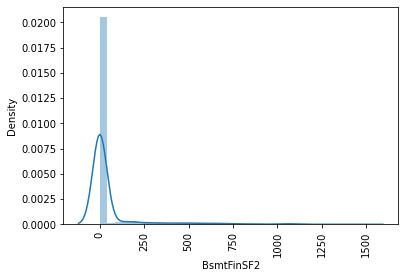

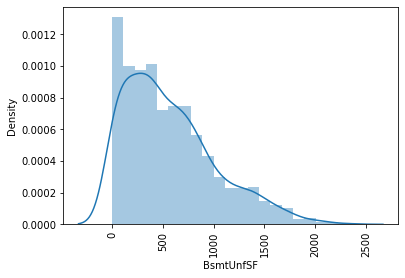

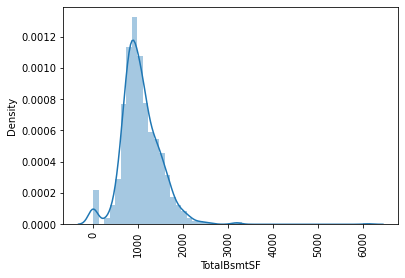

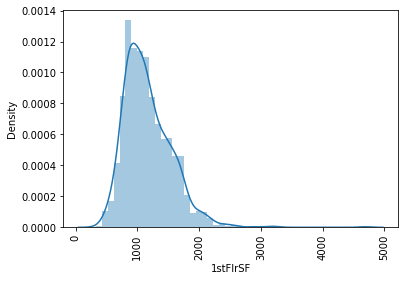

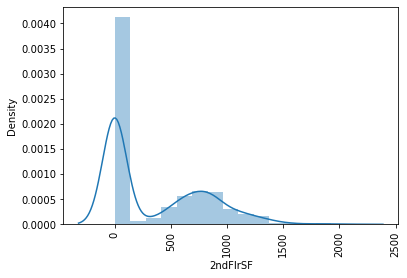

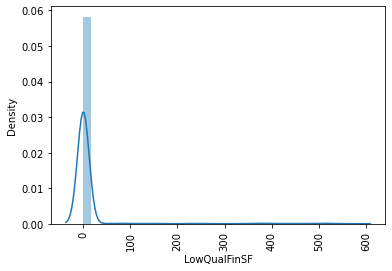

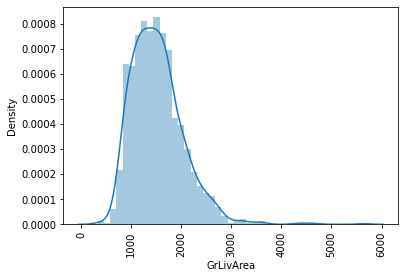

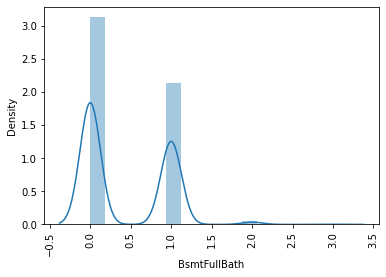

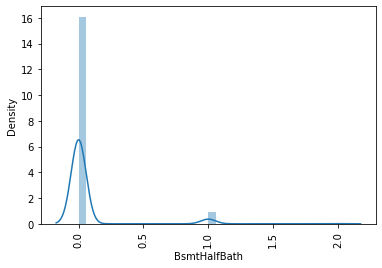

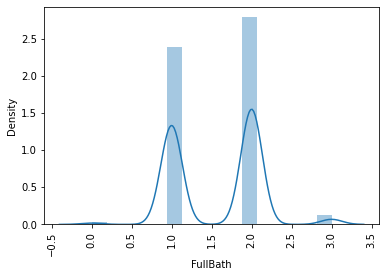

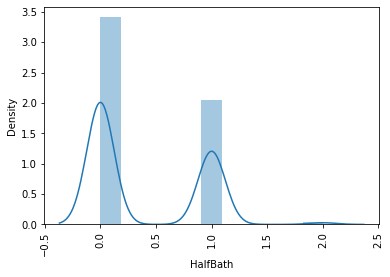

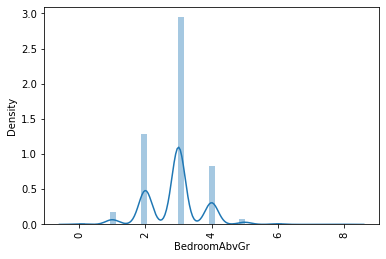

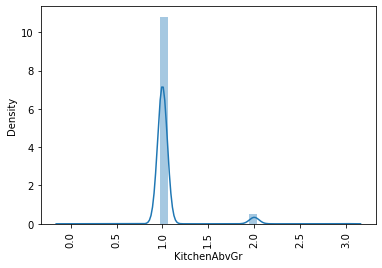

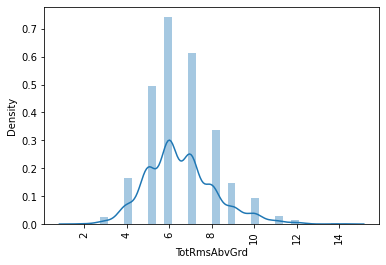

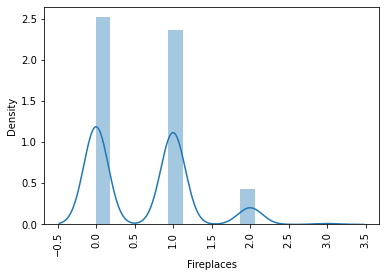

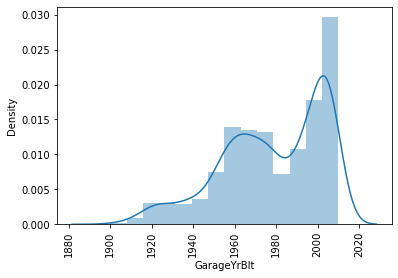

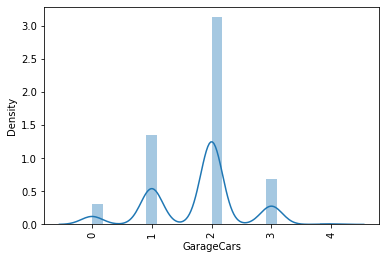

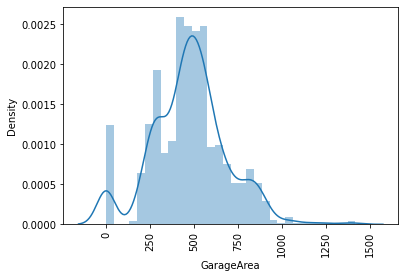

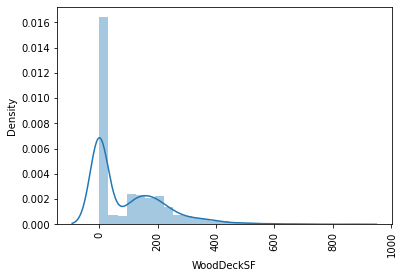

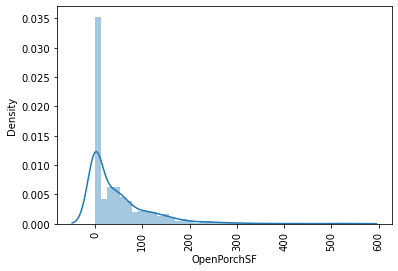

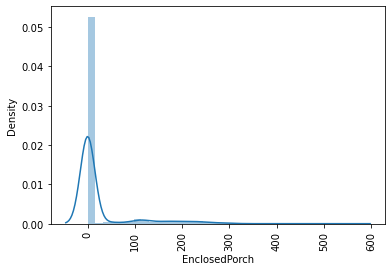

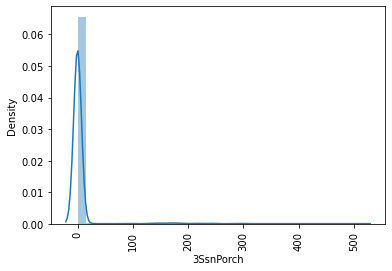

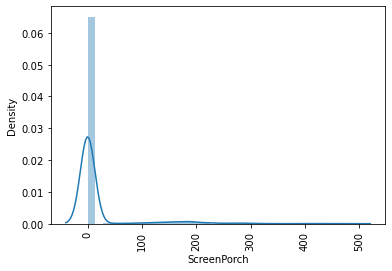

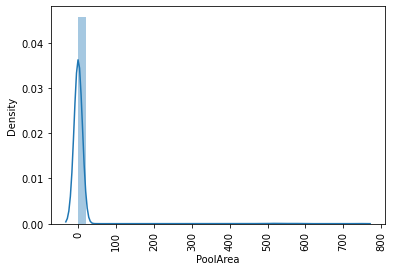

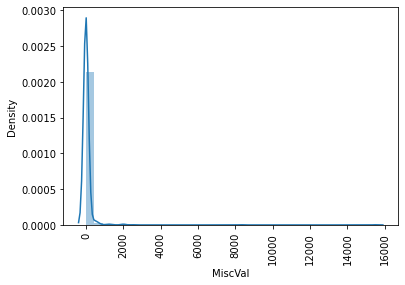

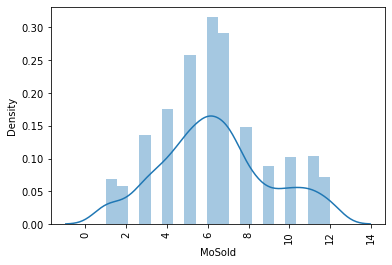

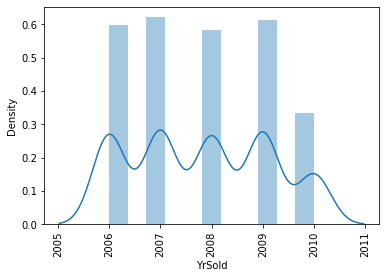

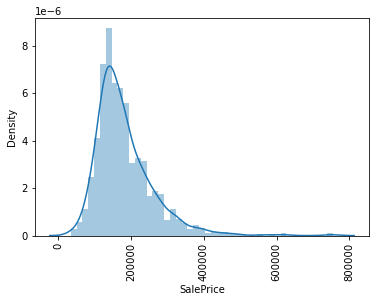

In [21]:
for i in Train.describe().columns:
    sns.distplot(Train[i])
    plt.xticks(rotation=90)
    plt.show()

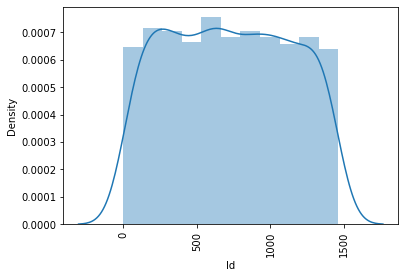

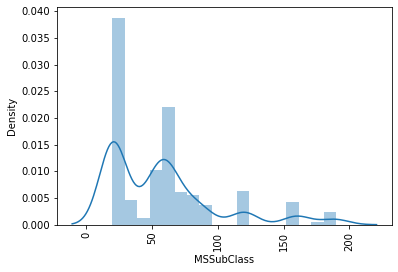

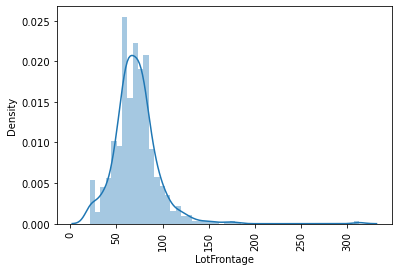

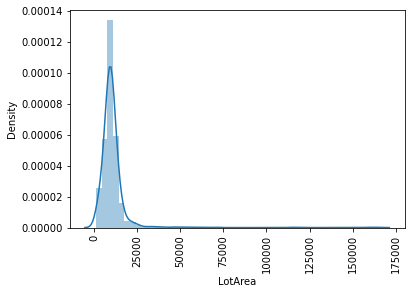

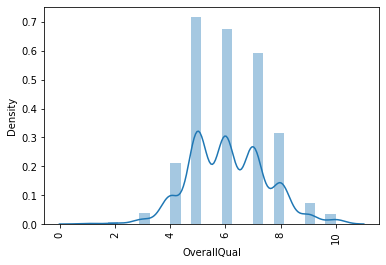

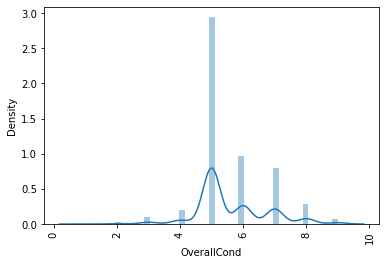

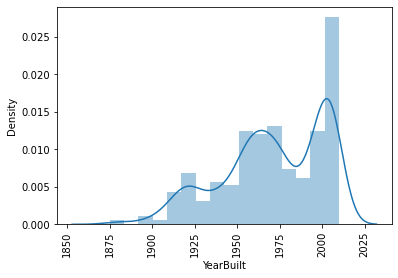

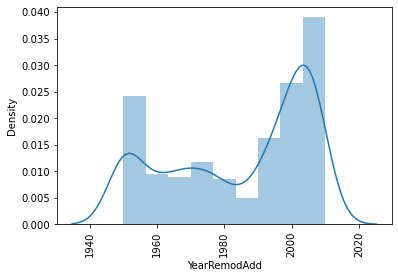

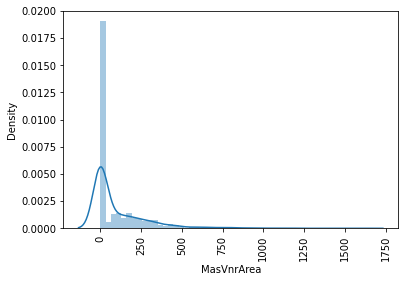

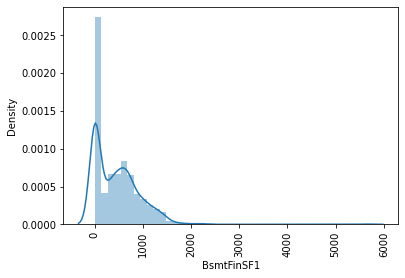

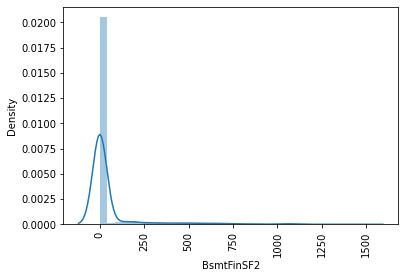

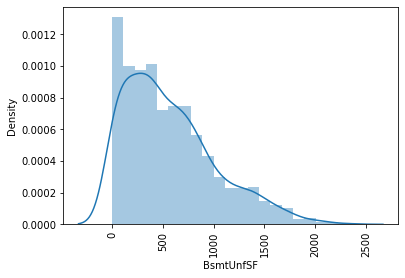

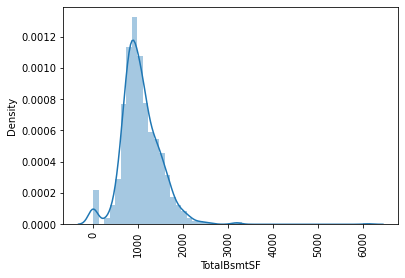

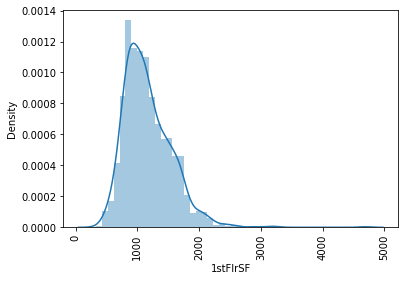

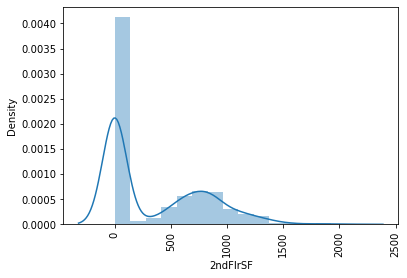

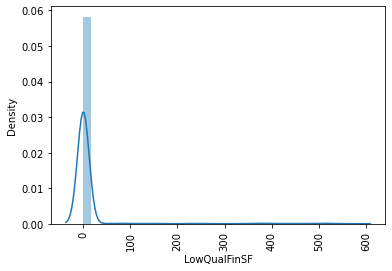

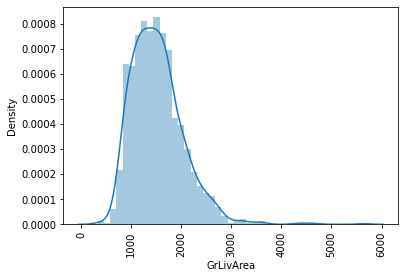

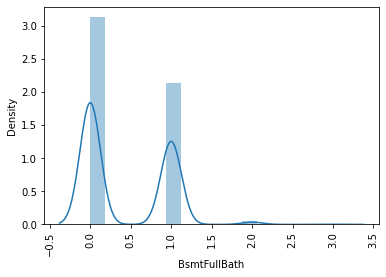

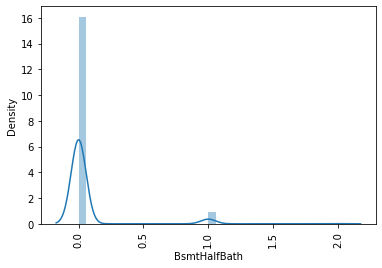

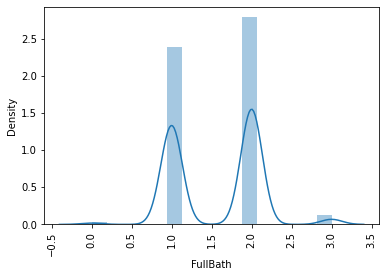

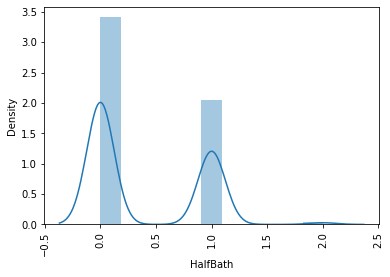

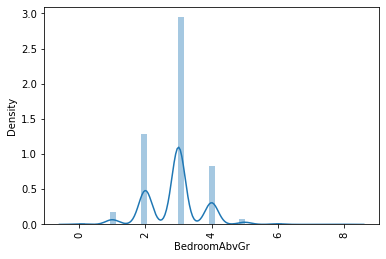

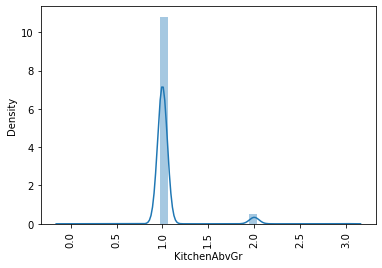

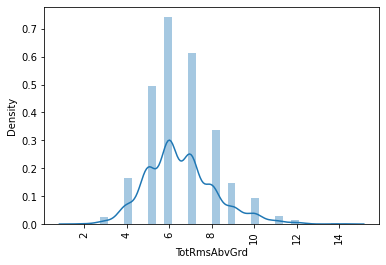

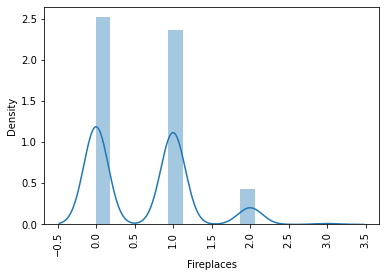

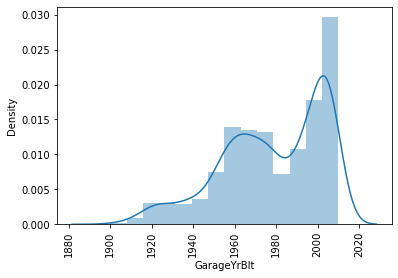

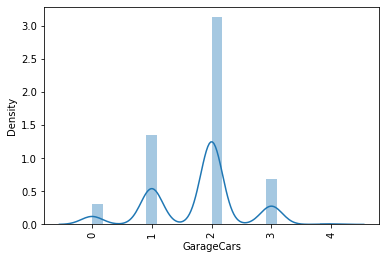

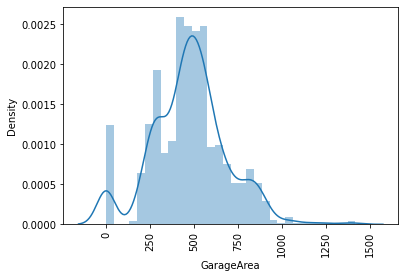

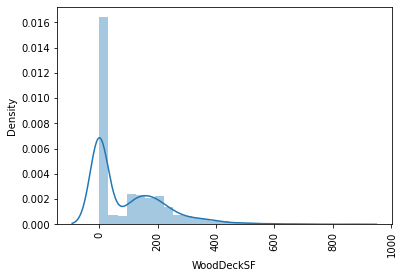

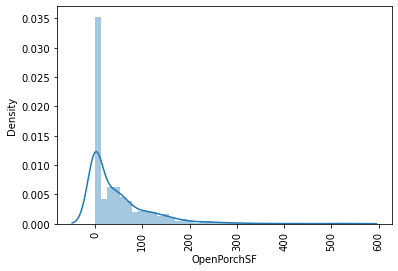

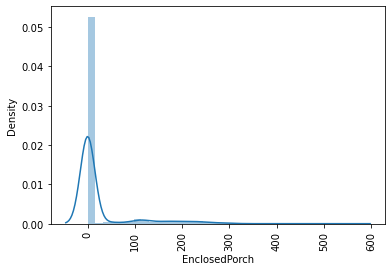

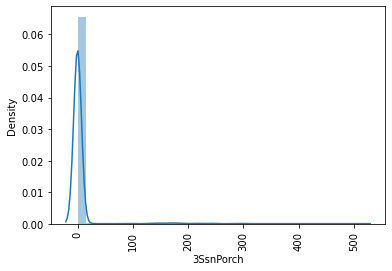

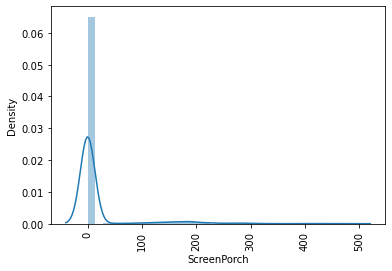

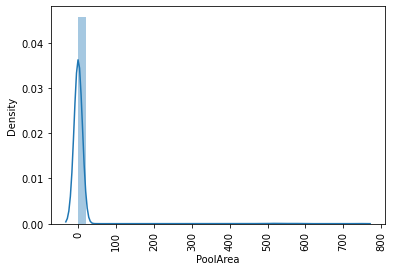

ValueError: could not convert string to float: 'Ex'

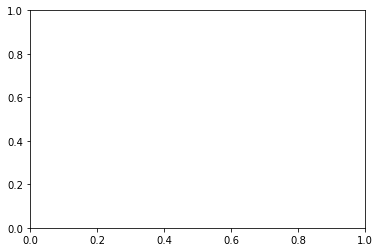

In [22]:
for i in Test.describe().columns:
    sns.distplot(Train[i])
    plt.xticks(rotation=90)
    plt.show()

In [49]:
#BiVariate

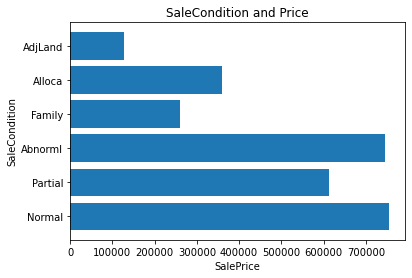

In [44]:
plt.barh(Train['SaleCondition'],Train['SalePrice'])
plt.title('SaleCondition and Price')
plt.xlabel('SalePrice')
plt.ylabel('SaleCondition')
plt.show()

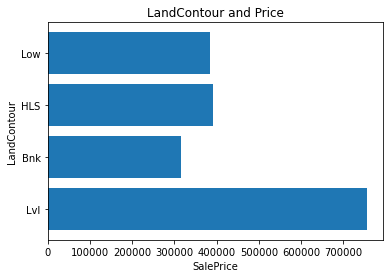

In [45]:
plt.barh(Train['LandContour'],Train['SalePrice'])
plt.title('LandContour and Price')
plt.xlabel('SalePrice')
plt.ylabel('LandContour')
plt.show()

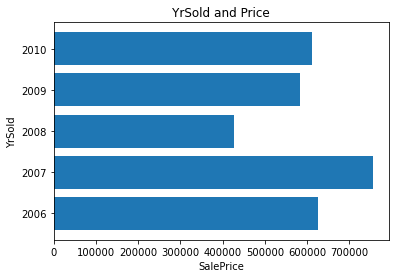

In [46]:
plt.barh(Train['YrSold'],Train['SalePrice'])
plt.title('YrSold and Price')
plt.xlabel('SalePrice')
plt.ylabel('YrSold')
plt.show()

<AxesSubplot:title={'center':'SalePrice and LotArea'}, xlabel='SalePrice', ylabel='LotArea'>

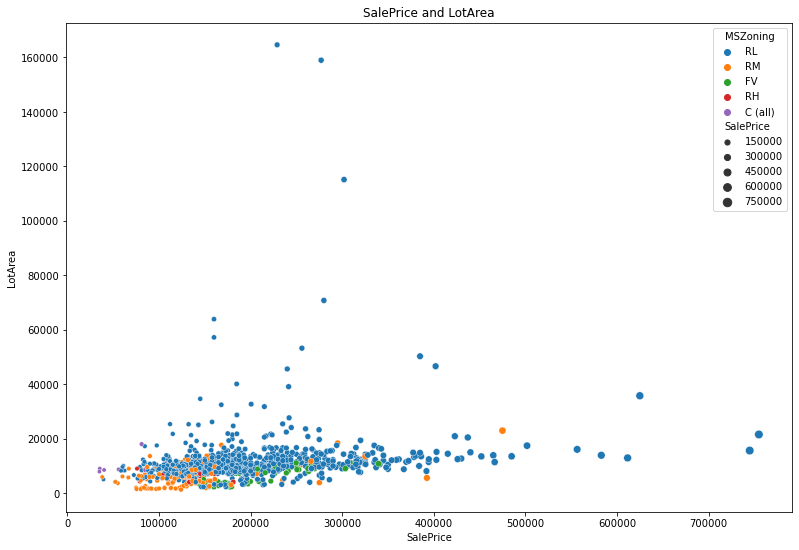

In [47]:
plt.figure(figsize=(13,9))
plt.xlabel('SalePrice')
plt.ylabel('LotArea')
plt.title('SalePrice and LotArea')
sns.scatterplot(x='SalePrice',y='LotArea',hue='MSZoning',size='SalePrice',data=Train)

Text(0.5, 1.0, 'House Price vs YearSold')

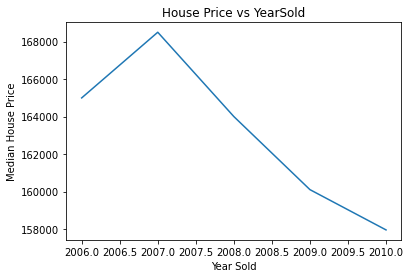

In [48]:
Train.groupby('YrSold')['SalePrice'].median().plot()
plt.xlabel('Year Sold')
plt.ylabel('Median House Price')
plt.title("House Price vs YearSold")

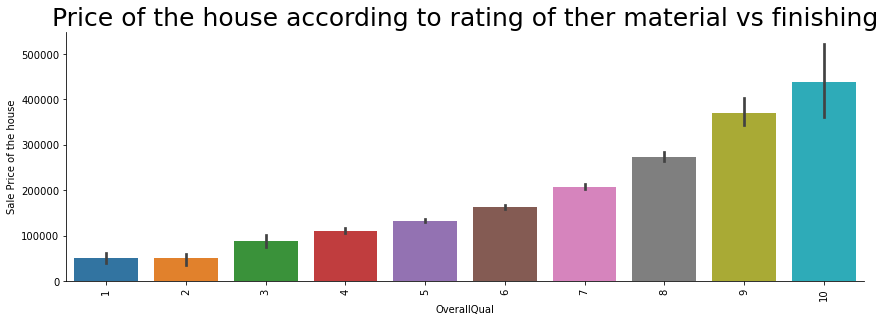

In [54]:
#Factor plot of OverallQual vs SalePrice
sns.factorplot(x="OverallQual",y="SalePrice",data=Train,kind="bar",size = 4,aspect=3)
plt.title('Price of the house according to rating of ther material vs finishing',fontsize=25)
plt.ylabel("Sale Price of the house")
plt.xticks(rotation=90)
plt.show()

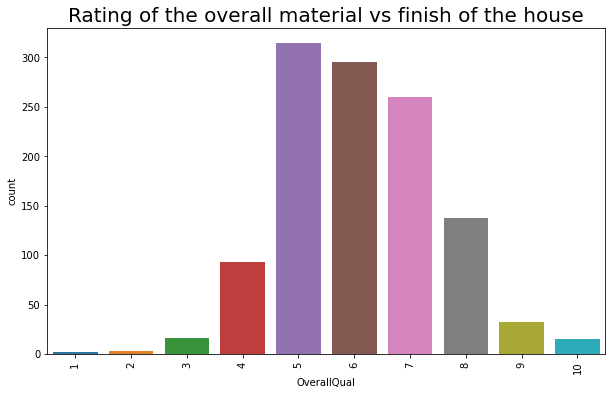

5     314
6     295
7     260
8     138
4      93
9      32
3      16
10     15
2       3
1       2
Name: OverallQual, dtype: int64


In [53]:
plt.figure(figsize=(10,6))
sns.countplot(Train['OverallQual'])
plt.title("Rating of the overall material vs finish of the house",fontsize=20)
plt.xticks(rotation=90)
plt.show()

print(Train.OverallQual.value_counts())

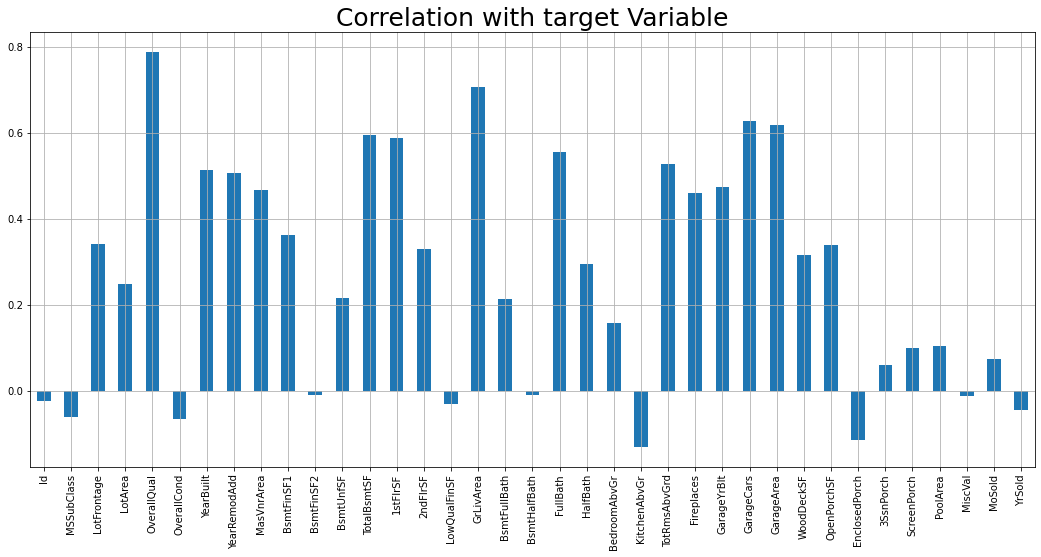

In [55]:
#Checking the correlation with target variable that is SalePrice
plt.figure(figsize=(18,8))
Train.drop('SalePrice', axis=1).corrwith(Train['SalePrice']).plot(kind='bar',grid=True )
plt.xticks(rotation=90)
plt.title("Correlation with target Variable",fontsize=25)
plt.show()

In [56]:
df=pd.concat([Train,Test],ignore_index=True)
df

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0      127         120       RL          NaN     4928   Pave   NaN      IR1   
1      889          20       RL         95.0    15865   Pave   NaN      IR1   
2      793          60       RL         92.0     9920   Pave   NaN      IR1   
3      110          20       RL        105.0    11751   Pave   NaN      IR1   
4      422          20       RL          NaN    16635   Pave   NaN      IR1   
5     1197          60       RL         58.0    14054   Pave   NaN      IR1   
6      561          20       RL          NaN    11341   Pave   NaN      IR1   
7     1041          20       RL         88.0    13125   Pave   NaN      Reg   
8      503          20       RL         70.0     9170   Pave   NaN      Reg   
9      576          50       RL         80.0     8480   Pave   NaN      Reg   
10     449          50       RM         50.0     8600   Pave   NaN      Reg   
11     833          60       RL         44.0     9548   Pave   NaN      IR1   
12     277          20       RL        129.0     9196   Pave   NaN      IR1   
13      84          20       RL         80.0     8892   Pave   NaN      IR1   
14     888          50       RL         59.0    16466   Pave   NaN      IR1   
15    1013          70       RL         55.0    10592   Pave   NaN      Reg   
16    1154          30       RM          NaN     5890   Pave   NaN      Reg   
17     728          20       RL         64.0     7314   Pave   NaN      Reg   
18     270          20       RL          NaN     7917   Pave   NaN      IR1   
19    1105         160       RM         24.0     2016   Pave   NaN      Reg   
20     259          60       RL         80.0    12435   Pave   NaN      Reg   
21    1407          85       RL         70.0     8445   Pave   NaN      Reg   
22    1459          20       RL         68.0     9717   Pave   NaN      Reg   
23     997          20       RL          NaN    10659   Pave   NaN      IR1   
24    1094          20       RL         71.0     9230   Pave   NaN      Reg   
25     114          20       RL          NaN    21000   Pave   NaN      Reg   
26    1384          30       RL          NaN    25339   Pave   NaN      Reg   
27     379          20       RL         88.0    11394   Pave   NaN      Reg   
28     556          45       RM         58.0     6380   Pave   NaN      Reg   
29     464          70       RL         74.0    11988   Pave   NaN      IR1   
30      46         120       RL         61.0     7658   Pave   NaN      Reg   
31     426          60       RM         60.0     3378   Pave  Grvl      Reg   
32    1231          90       RL          NaN    18890   Pave   NaN      IR1   
33     171          50       RM          NaN    12358   Pave   NaN      IR1   
34     869          60       RL          NaN    14762   Pave   NaN      IR2   
35     151          20       RL        120.0    10356   Pave   NaN      Reg   
36     859          20       RL         80.0    10400   Pave   NaN      Reg   
37     176          20       RL         84.0    12615   Pave   NaN      Reg   
38     361          85       RL          NaN     7540   Pave   NaN      IR1   
39     590          40       RM         50.0     9100   Pave   NaN      Reg   
40     172          20       RL        141.0    31770   Pave   NaN      IR1   
41     527          20       RL         70.0    13300   Pave   NaN      Reg   
42    1365         160       FV         30.0     3180   Pave  Pave      Reg   
43     146         160       RM         24.0     2522   Pave   NaN      Reg   
44    1006          80       RL         65.0     8385   Pave   NaN      Reg   
45     275          20       RL         76.0     8314   Pave   NaN      Reg   
46     380          60       RL         60.0     8123   Pave   NaN      IR1   
47    1309          20       RM        100.0    12000   Pave   NaN      Reg   
48     534          20       RL         50.0     5000   Pave   NaN      Reg   
49     494          20       RL         70.0     7931   Pa

In [57]:
#Seeing the NaN values in ratio
print('\nPercentage of missing values in each column:')
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False).head(20)


Percentage of missing values in each column:


PoolQC          0.995205
MiscFeature     0.963014
Alley           0.937671
Fence           0.807534
FireplaceQu     0.472603
SalePrice       0.200000
LotFrontage     0.177397
GarageQual      0.055479
GarageCond      0.055479
GarageType      0.055479
GarageYrBlt     0.055479
GarageFinish    0.055479
BsmtFinType2    0.026027
BsmtExposure    0.026027
BsmtQual        0.025342
BsmtCond        0.025342
BsmtFinType1    0.025342
MasVnrArea      0.005479
MasVnrType      0.005479
Electrical      0.000685
dtype: float64

In [58]:
# Removing columns having more than 30% missing values
df = df.drop('PoolQC', axis=1)
df = df.drop('MiscFeature', axis=1)
df = df.drop('Alley', axis=1)
df = df.drop('Fence',axis=1)
df = df.drop('FireplaceQu',axis=1)

In [60]:
df = df[df.isnull().sum(axis=1) <= 1]

In [61]:
#Percentage of missing values in each column
print(round(100*(df.isnull().sum()/len(df.index)), 2))

Id                0.00
MSSubClass        0.00
MSZoning          0.00
LotFrontage      15.43
LotArea           0.00
Street            0.00
LotShape          0.00
LandContour       0.00
Utilities         0.00
LotConfig         0.00
LandSlope         0.00
Neighborhood      0.00
Condition1        0.00
Condition2        0.00
BldgType          0.00
HouseStyle        0.00
OverallQual       0.00
OverallCond       0.00
YearBuilt         0.00
YearRemodAdd      0.00
RoofStyle         0.00
RoofMatl          0.00
Exterior1st       0.00
Exterior2nd       0.00
MasVnrType        0.00
MasVnrArea        0.00
ExterQual         0.00
ExterCond         0.00
Foundation        0.00
BsmtQual          0.00
BsmtCond          0.00
BsmtExposure      0.08
BsmtFinType1      0.00
BsmtFinSF1        0.00
BsmtFinType2      0.08
BsmtFinSF2        0.00
BsmtUnfSF         0.00
TotalBsmtSF       0.00
Heating           0.00
HeatingQC         0.00
CentralAir        0.00
Electrical        0.00
1stFlrSF          0.00
2ndFlrSF   

In [62]:
df['LotFrontage'].describe(percentiles = [0.9, 0.95, 0.99])

count    1096.000000
mean       70.767336
std        24.490864
min        21.000000
50%        70.000000
90%        96.000000
95%       108.000000
99%       141.150000
max       313.000000
Name: LotFrontage, dtype: float64

In [63]:
df['LotFrontage'].fillna(df['LotFrontage'].mean(),inplace=True)

In [64]:
df.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1296.000000  1296.000000  1296.000000    1296.000000  1296.000000   
mean    729.057870    55.972222    70.767336   10664.395062     6.224537   
std     421.555409    41.264988    22.520410   10376.097970     1.333170   
min       1.000000    20.000000    21.000000    1300.000000     2.000000   
25%     361.750000    20.000000    60.000000    7737.000000     5.000000   
50%     724.500000    50.000000    70.767336    9590.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11700.000000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1296.000000  1296.000000   1296.000000  1296.000000  1296.000000   
mean      5.593364  1972.845679   1985.696759   108.885802   461.688272   
std       1.072184    29.842096     20.457958   185.165023   460.258026   
min       2.000000  1880.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1955.000000   1968.000000     0.000000     0.000000   
50%       5.000000  1976.000000   1995.000000     0.000000   406.500000   
75%       6.000000  2002.000000   2004.000000   172.500000   733.250000   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000   

        BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  \
count  1296.000000  1296.000000  1296.000000  1296.000000  1296.000000   
mean     49.297068   588.889660  1099.875000  1178.012346   355.383488   
std     166.703345   442.146302   411.091396   388.179720   439.705574   
min       0.000000     0.000000   105.000000   438.000000     0.000000   
25%       0.000000   251.750000   824.750000   894.000000     0.000000   
50%       0.000000   499.000000  1026.000000  1101.500000     0.000000   
75%       0.000000   832.000000  1333.250000  1422.000000   739.000000   
max    1474.000000  2336.000000  6110.000000  4692.000000  2065.000000   

       LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath  \
count   1296.000000  1296.000000   1296.000000   1296.000000  1296.000000   
mean       4.358796  1537.754630      0.439043      0.057099     1.576389   
std       41.360643   521.290781      0.516286      0.235424     0.546267   
min        0.000000   438.000000      0.000000      0.000000     0.000000   
25%        0.000000  1158.000000      0.000000      0.000000     1.000000   
50%        0.000000  1479.000000      0.000000      0.000000     2.000000   
75%        0.000000  1792.000000      1.000000      0.000000     2.000000   
max      572.000000  5642.000000      2.000000      2.000000     3.000000   

          HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  \
count  1296.000000   1296.000000   1296.000000   1296.000000  1296.000000   
mean      0.398920      2.868827      1.030864      6.564043     0.640432   
std       0.503853      0.772950      0.177423      1.578985     0.644814   
min       0.000000      0.000000      1.000000      3.000000     0.000000   
25%       0.000000      2.000000      1.000000      6.000000     0.000000   
50%       0.000000      3.000000      1.000000      6.000000     1.000000   
75%       1.000000      3.000000      1.000000      7.000000     1.000000   
max       2.000000      6.000000      3.000000     12.000000     3.000000   

       GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  \
count  1296.000000  1296.000000  1296.000000  1296.000000  1296.000000   
mean   1978.502315     1.873457   501.793210    97.895062    47.469136   
std      25.027521     0.639285   187.939809   126.924134    65.046362   
min    1900.000000     1.000000   160.000000     0.000000     0.000000   
25%    1961.000000     1.000000   371.500000     0.000000     0.000000   
50%    1980.000000     2.000000   484.000000     0.000000    28.000000   
75%    2002.000000     2.000000   588.000000   171.250000    70.000000   
max    2

In [65]:
df['LotFrontage'] = df['LotFrontage'].astype(int)

In [66]:
threshold=3
df = df[ np.abs(df['LotFrontage'] - df['LotFrontage'].mean()) / df['LotFrontage'].std() < threshold]

In [67]:
df['LotFrontage'].describe()

count    1283.000000
mean       69.525331
std        18.784846
min        21.000000
25%        60.000000
50%        70.000000
75%        80.000000
max       137.000000
Name: LotFrontage, dtype: float64

In [68]:
df.describe(include=['object']).T

count unique      top  freq
MSZoning       1283      5       RL  1017
Street         1283      2     Pave  1278
LotShape       1283      4      Reg   816
LandContour    1283      4      Lvl  1160
Utilities      1283      1   AllPub  1283
LotConfig      1283      5   Inside   931
LandSlope      1283      3      Gtl  1219
Neighborhood   1283     25    NAmes   200
Condition1     1283      9     Norm  1113
Condition2     1283      8     Norm  1269
BldgType       1283      5     1Fam  1090
HouseStyle     1283      8   1Story   635
RoofStyle      1283      6    Gable   995
RoofMatl       1283      7  CompShg  1261
Exterior1st    1283     14  VinylSd   470
Exterior2nd    1283     16  VinylSd   459
MasVnrType     1283      4     None   734
ExterQual      1283      4       TA   769
ExterCond      1283      4       TA  1135
Foundation     1283      5    PConc   594
BsmtQual       1283      4       TA   572
BsmtCond       1283      4       TA  1186
BsmtExposure   1282      4       No   858
BsmtFinType1   1283      6      Unf   384
BsmtFinType2   1282      6      Unf  1127
Heating        1283      4     GasA  1264
HeatingQC      1283      5       Ex   675
CentralAir     1283      2        Y  1222
Electrical     1283      5    SBrkr  1188
KitchenQual    1283      4       TA   624
Functional     1283      7      Typ  1200
GarageType     1283      6   Attchd   815
GarageFinish   1283      3      Unf   562
GarageQual     1283      5       TA  1215
GarageCond     1283      5       TA  1233
PavedDrive     1283      3        Y  1204
SaleType       1283      9       WD  1107
SaleCondition  1283      6   Normal  1058

In [69]:
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0  127         120       RL           70     4928   Pave      IR1         Lvl   
1  889          20       RL           95    15865   Pave      IR1         Lvl   
2  793          60       RL           92     9920   Pave      IR1         Lvl   
3  110          20       RL          105    11751   Pave      IR1         Lvl   
4  422          20       RL           70    16635   Pave      IR1         Lvl   

  Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType  \
0    AllPub    Inside       Gtl      NPkVill       Norm       Norm   TwnhsE   
1    AllPub    Inside       Mod        NAmes       Norm       Norm     1Fam   
2    AllPub   CulDSac       Gtl      NoRidge       Norm       Norm     1Fam   
3    AllPub    Inside       Gtl       NWAmes       Norm       Norm     1Fam   
4    AllPub       FR2       Gtl       NWAmes       Norm       Norm     1Fam   

  HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle  \
0     1Story            6            5       1976          1976     Gable   
1     1Story            8            6       1970          1970      Flat   
2     2Story            7            5       1996          1997     Gable   
3     1Story            6            6       1977          1977       Hip   
4     1Story            6            7       1977          2000     Gable   

  RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond  \
0  CompShg     Plywood     Plywood       None         0.0        TA        TA   
1  Tar&Grv     Wd Sdng     Wd Sdng       None         0.0        Gd        Gd   
2  CompShg     MetalSd     MetalSd       None         0.0        Gd        TA   
3  CompShg     Plywood     Plywood    BrkFace       480.0        TA        TA   
4  CompShg     CemntBd     CmentBd      Stone       126.0        Gd        TA   

  Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1  \
0     CBlock       Gd       TA           No          ALQ         120   
1      PConc       TA       Gd           Gd          ALQ         351   
2      PConc       Gd       TA           Av          GLQ         862   
3     CBlock       Gd       TA           No          BLQ         705   
4     CBlock       Gd       TA           No          ALQ        1246   

  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC  \
0          Unf           0        958         1078    GasA        TA   
1          Rec         823       1043         2217    GasA        Ex   
2          Unf           0        255         1117    GasA        Ex   
3          Unf           0       1139         1844    GasA        Ex   
4          Unf           0        356         1602    GasA        Gd   

  CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  \
0          Y      SBrkr       958         0             0        958   
1          Y      SBrkr      2217         0             0       2217   
2          Y      SBrkr      1127       886             0       2013   
3          Y      SBrkr      1844         0             0       1844   
4          Y      SBrkr      1602         0             0       1602   

   BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0             0             0         2         0             2             1   
1             1             0         2         0             4             1   
2             1             0         2         1             3             1   
3             0             0         2         0             3             1   
4             0             1         2         0             3             1   

  KitchenQual  TotRmsAbvGrd Functional  Fireplaces GarageType  GarageYrBlt  \
0          TA             5        Typ           1     Attchd       1977.0   
1          Gd             8        Typ           1     Attchd       1970.0   
2          TA             8        Typ           1     Attchd       1997

In [70]:
df_corr = df.corr()
df_corr

Id  MSSubClass  LotFrontage   LotArea  OverallQual  \
Id             1.000000    0.014491    -0.032663 -0.033272    -0.055135   
MSSubClass     0.014491    1.000000    -0.423796 -0.140317     0.050758   
LotFrontage   -0.032663   -0.423796     1.000000  0.248285     0.217963   
LotArea       -0.033272   -0.140317     0.248285  1.000000     0.086049   
OverallQual   -0.055135    0.050758     0.217963  0.086049     1.000000   
OverallCond    0.013719   -0.098448    -0.043490  0.017021    -0.163509   
YearBuilt     -0.030984    0.049265     0.114486 -0.001442     0.578874   
YearRemodAdd  -0.035767    0.028996     0.063326  0.018399     0.552373   
MasVnrArea    -0.059912    0.023881     0.197261  0.115767     0.411695   
BsmtFinSF1    -0.022619   -0.074536     0.134204  0.176032     0.179251   
BsmtFinSF2     0.002581   -0.072938     0.047482  0.057709    -0.081715   
BsmtUnfSF     -0.012469   -0.143300     0.156332  0.005703     0.303097   
TotalBsmtSF   -0.038776   -0.280628     0.352002  0.230185     0.516084   
1stFlrSF      -0.008856   -0.263620     0.381607  0.274933     0.477919   
2ndFlrSF      -0.008712    0.309185     0.041206  0.059021     0.269155   
LowQualFinSF  -0.040550    0.017749    -0.023034  0.003187    -0.027523   
GrLivArea     -0.017453    0.074042     0.318881  0.256885     0.589011   
BsmtFullBath   0.012452   -0.010283     0.056797  0.124202     0.079577   
BsmtHalfBath  -0.034726    0.003725    -0.004478  0.048276    -0.066815   
FullBath      -0.007677    0.123009     0.175799  0.119890     0.579519   
HalfBath      -0.018229    0.192000     0.037543  0.011415     0.251067   
BedroomAbvGr   0.043840   -0.057326     0.264361  0.131942     0.071076   
KitchenAbvGr   0.015144    0.243755     0.019560 -0.009014    -0.137255   
TotRmsAbvGrd   0.013889    0.029761     0.317388  0.180029     0.434854   
Fireplaces    -0.023097   -0.025172     0.213590  0.259679     0.373793   
GarageYrBlt   -0.013417    0.075436     0.078800 -0.018285     0.552059   
GarageCars     0.000407    0.005287     0.296514  0.160348     0.591711   
GarageArea    -0.000839   -0.069651     0.342280  0.183715     0.527487   
WoodDeckSF    -0.042215   -0.003422     0.090389  0.218756     0.225412   
OpenPorchSF   -0.012920   -0.000293     0.133693  0.081025     0.316019   
EnclosedPorch  0.021857   -0.026534    -0.014244 -0.024468    -0.136819   
3SsnPorch     -0.044045   -0.041949     0.084764  0.028500     0.027427   
ScreenPorch    0.003545   -0.021924     0.056383  0.056651     0.046041   
PoolArea       0.061658    0.005451     0.017860  0.025401    -0.000248   
MiscVal        0.000841   -0.020929     0.003992  0.053688    -0.029385   
MoSold         0.014916   -0.017274     0.016224  0.014131     0.067738   
YrSold         0.008256   -0.020181     0.000708 -0.030665    -0.015557   
SalePrice     -0.037040   -0.057568     0.338673  0.242794     0.787848   

               OverallCond  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  \
Id                0.013719  -0.030984     -0.035767   -0.059912   -0.022619   
MSSubClass       -0.098448   0.049265      0.028996    0.023881   -0.074536   
LotFrontage      -0.043490   0.114486      0.063326    0.197261    0.134204   
LotArea           0.017021  -0.001442      0.018399    0.115767    0.176032   
OverallQual      -0.163509   0.578874      0.552373    0.411695    0.179251   
OverallCond       1.000000  -0.419584      0.032707   -0.154994   -0.046965   
YearBuilt        -0.419584   1.000000      0.620808    0.312518    0.233229   
YearRemodAdd      0.032707   0.620808      1.000000    0.177957    0.099033   
MasVnrArea       -0.154994   0.312518      0.177957    1.000000    0.251175   
BsmtFinSF1       -0.046965   0.233229      0.099033    0.251175    1.000000   
BsmtFinSF2        0.028662  -0.060161     -0.076708   -0.084833   -0.064261   
BsmtUnfSF        -0.161479   0.149992      0.176844    0.110846   -0.576499   
TotalBsmtSF      -0.226585   0.410020      0.282314    0.374552    0

In [71]:
df['SalePrice'].fillna(df['SalePrice'].mean(),inplace=True)

In [73]:
categorical_features=[col for col in df.columns if df[col].dtype=='O']
categorical_features

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

In [74]:
for i in categorical_features:
    temp=df.groupby(i)['SalePrice'].count()/len(df)
    temp_df=temp[temp>0.01].index
    df[i]=np.where(df[i].isin(temp_df),df[i],'Rare_var')

In [75]:
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0  127         120       RL           70     4928   Pave      IR1         Lvl   
1  889          20       RL           95    15865   Pave      IR1         Lvl   
2  793          60       RL           92     9920   Pave      IR1         Lvl   
3  110          20       RL          105    11751   Pave      IR1         Lvl   
4  422          20       RL           70    16635   Pave      IR1         Lvl   

  Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType  \
0    AllPub    Inside       Gtl     Rare_var       Norm       Norm   TwnhsE   
1    AllPub    Inside       Mod        NAmes       Norm       Norm     1Fam   
2    AllPub   CulDSac       Gtl      NoRidge       Norm       Norm     1Fam   
3    AllPub    Inside       Gtl       NWAmes       Norm       Norm     1Fam   
4    AllPub       FR2       Gtl       NWAmes       Norm       Norm     1Fam   

  HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle  \
0     1Story            6            5       1976          1976     Gable   
1     1Story            8            6       1970          1970  Rare_var   
2     2Story            7            5       1996          1997     Gable   
3     1Story            6            6       1977          1977       Hip   
4     1Story            6            7       1977          2000     Gable   

   RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual  \
0   CompShg     Plywood     Plywood       None         0.0        TA   
1  Rare_var     Wd Sdng     Wd Sdng       None         0.0        Gd   
2   CompShg     MetalSd     MetalSd       None         0.0        Gd   
3   CompShg     Plywood     Plywood    BrkFace       480.0        TA   
4   CompShg     CemntBd     CmentBd      Stone       126.0        Gd   

  ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  \
0        TA     CBlock       Gd       TA           No          ALQ   
1        Gd      PConc       TA       Gd           Gd          ALQ   
2        TA      PConc       Gd       TA           Av          GLQ   
3        TA     CBlock       Gd       TA           No          BLQ   
4        TA     CBlock       Gd       TA           No          ALQ   

   BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating  \
0         120          Unf           0        958         1078    GasA   
1         351          Rec         823       1043         2217    GasA   
2         862          Unf           0        255         1117    GasA   
3         705          Unf           0       1139         1844    GasA   
4        1246          Unf           0        356         1602    GasA   

  HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0        TA          Y      SBrkr       958         0             0   
1        Ex          Y      SBrkr      2217         0             0   
2        Ex          Y      SBrkr      1127       886             0   
3        Ex          Y      SBrkr      1844         0             0   
4        Gd          Y      SBrkr      1602         0             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0        958             0             0         2         0             2   
1       2217             1             0         2         0             4   
2       2013             1             0         2         1             3   
3       1844             0             0         2         0             3   
4       1602             0             1         2         0             3   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces GarageType  \
0             1          TA             5        Typ           1     Attchd   
1             1          Gd             8        Typ           1     Attchd   
2             1          TA             8        Typ           1     Attchd   
3             1          TA             7        Typ           1    

In [76]:
for i in categorical_features:
    labels_ordered=df.groupby([i])['SalePrice'].mean().sort_values().index
    labels_ordered={k:i for i,k in enumerate(labels_ordered,0)}
    df[i]=df[i].map(labels_ordered)

In [77]:
#Featire Scalling
f_scale=[coll for coll in df.columns if coll not in ['Id','SalePrice']]

scaler=MinMaxScaler()
scaler.fit(df[f_scale])

MinMaxScaler()

In [79]:
df = pd.concat([df[['Id', 'SalePrice']].reset_index(drop=True), pd.DataFrame(scaler.transform(df[f_scale]), 
                                                                             columns=f_scale)],axis=1)

In [80]:
df.head()

Id  SalePrice  MSSubClass  MSZoning  LotFrontage   LotArea  Street  \
0  127   128000.0    0.588235  0.666667     0.422414  0.022209     1.0   
1  889   268000.0    0.000000  0.666667     0.637931  0.089159     1.0   
2  793   269790.0    0.235294  0.666667     0.612069  0.052767     1.0   
3  110   190000.0    0.000000  0.666667     0.724138  0.063975     1.0   
4  422   215000.0    0.000000  0.666667     0.422414  0.093872     1.0   

   LotShape  LandContour  Utilities  LotConfig  LandSlope  Neighborhood  \
0  0.333333     0.333333        0.0       0.25        0.0      0.428571   
1  0.333333     0.333333        0.0       0.25        0.5      0.333333   
2  0.333333     0.333333        0.0       1.00        0.0      1.000000   
3  0.333333     0.333333        0.0       0.25        0.0      0.476190   
4  0.333333     0.333333        0.0       0.00        0.0      0.476190   

   Condition1  Condition2  BldgType  HouseStyle  OverallQual  OverallCond  \
0         0.6         1.0      0.75         0.8        0.500     0.428571   
1         0.6         1.0      1.00         0.8        0.750     0.571429   
2         0.6         1.0      1.00         1.0        0.625     0.428571   
3         0.6         1.0      1.00         0.8        0.500     0.571429   
4         0.6         1.0      1.00         0.8        0.500     0.714286   

   YearBuilt  YearRemodAdd  RoofStyle  RoofMatl  Exterior1st  Exterior2nd  \
0   0.738462      0.433333        0.0       0.0          0.6          0.6   
1   0.692308      0.333333        0.5       1.0          0.2          0.3   
2   0.892308      0.783333        0.0       0.0          0.1          0.2   
3   0.746154      0.450000        1.0       0.0          0.6          0.6   
4   0.746154      0.833333        0.0       0.0          1.0          1.0   

   MasVnrType  MasVnrArea  ExterQual  ExterCond  Foundation  BsmtQual  \
0    0.333333     0.00000   0.333333   0.666667    0.333333  0.666667   
1    0.333333     0.00000   0.666667   0.333333    1.000000  0.333333   
2    0.333333     0.00000   0.666667   0.666667    1.000000  0.666667   
3    0.666667     0.30000   0.333333   0.666667    0.333333  0.666667   
4    1.000000     0.07875   0.666667   0.666667    0.333333  0.666667   

   BsmtCond  BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtFinType2  BsmtFinSF2  \
0  0.666667          0.00           0.6    0.053097           0.6    0.000000   
1  1.000000          1.00           0.6    0.155310           0.2    0.558345   
2  0.666667          0.75           1.0    0.381416           0.6    0.000000   
3  0.666667          0.00           0.4    0.311947           0.6    0.000000   
4  0.666667          0.00           0.6    0.551327           0.6    0.000000   

   BsmtUnfSF  TotalBsmtSF  Heating  HeatingQC  CentralAir  Electrical  \
0   0.410103     0.313770      1.0       0.50         1.0         1.0   
1   0.446490     0.681071      1.0       1.00         1.0         1.0   
2   0.109161     0.326346      1.0       1.00         1.0         1.0   
3   0.487586     0.560787      1.0       1.00         1.0         1.0   
4   0.152397     0.482748      1.0       0.75         1.0         1.0   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0  0.186380  0.000000           0.0   0.122699           0.0           0.0   
1  0.637634  0.000000           0.0   0.419773           0.5           0.0   
2  0.246953  0.473291           0.0   0.371638           0.5           0.0   
3  0.503943  0.000000           0.0   0.331760           0.0           0.0   
4  0.417204  0.000000           0.0   0.274658           0.0           0.5   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  \
0  0.666667       0.0      0.333333           0.0     0.333333      0.222222   
1  0.666667       0.0      0.666667           0.0     0.666667      0.555556   
2  0.666667       0.5      0.500000           0.0     0.333333      0.555556   
3  0.666667       0.0      0

In [82]:
print(df.isnull().sum())

Id               0
SalePrice        0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr

In [83]:
float_features=[col for col in df.columns if df[col].dtype=='float64']
float_features

['SalePrice',
 'MSSubClass',
 'MSZoning',
 'LotFrontage',
 'LotArea',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',

In [84]:
for i in float_features:
    df[i] = df[i].astype(int)

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1283 entries, 0 to 1282
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Id             1283 non-null   int64
 1   SalePrice      1283 non-null   int32
 2   MSSubClass     1283 non-null   int32
 3   MSZoning       1283 non-null   int32
 4   LotFrontage    1283 non-null   int32
 5   LotArea        1283 non-null   int32
 6   Street         1283 non-null   int32
 7   LotShape       1283 non-null   int32
 8   LandContour    1283 non-null   int32
 9   Utilities      1283 non-null   int32
 10  LotConfig      1283 non-null   int32
 11  LandSlope      1283 non-null   int32
 12  Neighborhood   1283 non-null   int32
 13  Condition1     1283 non-null   int32
 14  Condition2     1283 non-null   int32
 15  BldgType       1283 non-null   int32
 16  HouseStyle     1283 non-null   int32
 17  OverallQual    1283 non-null   int32
 18  OverallCond    1283 non-null   int32
 19  YearBu

In [86]:
y = df['SalePrice']
x = df.drop('SalePrice', axis=1)

In [87]:
x_train, x_test,y_train,y_test=train_test_split(x,y,test_size=0.30)

In [92]:
import sklearn
from sklearn.metrics import mean_absolute_error, mean_squared_error,explained_variance_score,r2_score,mean_tweedie_deviance

import warnings
warnings.filterwarnings('ignore')

model=[LinearRegression(), Lasso(alpha=.1),Ridge(alpha=.1),KNeighborsRegressor(),DecisionTreeRegressor(),
      RandomForestRegressor(n_estimators=200),AdaBoostRegressor()]


for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    score=m.score(x_train,y_train)

    predm=m.predict(x_test)
    print(' Model :',m,'\n')
    print('Score is :',score )
    print('R2_Score',r2_score(y_test,predm))
    print('MSE',mean_squared_error(y_test,predm))
    print('R_MSE:',np.sqrt(mean_squared_error(y_test,predm)))

    print('\n')

 Model : LinearRegression() 

Score is : 0.672092971362809
R2_Score 0.3760056793226402
MSE 2846930632.2174497
R_MSE: 53356.63625283597


 Model : Lasso(alpha=0.1) 

Score is : 0.6720929223231156
R2_Score 0.37608234793722095
MSE 2846580837.002739
R_MSE: 53353.35825421619


 Model : Ridge(alpha=0.1) 

Score is : 0.6717839538619874
R2_Score 0.37410323267818546
MSE 2855610412.54362
R_MSE: 53437.91175320776


 Model : KNeighborsRegressor() 

Score is : 0.21633006195361437
R2_Score -0.218580468520422
MSE 5559688523.906389
R_MSE: 74563.31889009762


 Model : DecisionTreeRegressor() 

Score is : 1.0
R2_Score -0.09906919944779213
MSE 5014426681.701299
R_MSE: 70812.61668446731


 Model : RandomForestRegressor(n_estimators=200) 

Score is : 0.9307812265854002
R2_Score 0.4361334653277448
MSE 2572601795.955721
R_MSE: 50720.822114351824


 Model : AdaBoostRegressor() 

Score is : 0.5715598652115174
R2_Score 0.2935502035683072
MSE 3223127998.0272107
R_MSE: 56772.599007154946




In [97]:
for i in model:
    scoreCVS=cross_val_score(m,x,y,cv=10,scoring='r2')
    print('Model',i)
    print('Score',score)
    print('meanscore',score.mean(),'\n')
   

Model LinearRegression()
Score 0.5715598652115174
meanscore 0.5715598652115174 

Model Lasso(alpha=0.1)
Score 0.5715598652115174
meanscore 0.5715598652115174 

Model Ridge(alpha=0.1)
Score 0.5715598652115174
meanscore 0.5715598652115174 

Model KNeighborsRegressor()
Score 0.5715598652115174
meanscore 0.5715598652115174 

Model DecisionTreeRegressor()
Score 0.5715598652115174
meanscore 0.5715598652115174 

Model RandomForestRegressor(n_estimators=200)
Score 0.5715598652115174
meanscore 0.5715598652115174 

Model AdaBoostRegressor()
Score 0.5715598652115174
meanscore 0.5715598652115174 



In [ ]:
import joblib

joblib.dump(RandomForestRegressor(),'House_Price_Pred_Aus.obj')